<a href="https://colab.research.google.com/github/amoheric/Data-Science-Projects/blob/main/Synthetic_accident_data_set_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries install

In [ ]:
!pip install XlsxWriter
!pip install xlrd
!pip install openpyxl
!pip install dash
!pip install dash_bootstrap_components
!pip install jupyter_dash



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 7.5 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


# 1. Data Collection and Cleaning


* Data Collection

In [ ]:
import pandas as pd
import numpy as np
import requests
import io
import os
from google.colab import drive
from google.colab import files

# Mount Google Drive, which is essential for accessing files stored there directly via Colab.
drive.mount('/content/drive')

# Set seed for reproducibility
np.random.seed(42)

# Synthetic accident data
data = {
    'accident_id': np.arange(1, 1001), #
    'severity': np.random.choice(['Minor', 'Major', 'Fatal'], 1000),
    'location': np.random.choice(['City', 'Suburb', 'Rural'], 1000),
    'vehicle_type': np.random.choice(['Car', 'Motorcycle', 'Truck'], 1000),
    'driver_age': np.random.randint(18, 90, 1000),
    'driver_gender': np.random.choice(['Male', 'Female'], 1000),
    'weather': np.random.choice(['Sunny', 'Rainy', 'Snowy', 'Foggy'], 1000),
    'road_condition': np.random.choice(['Dry', 'Wet', 'Icy'], 1000),
    'light_condition': np.random.choice(['Daylight', 'Dark', 'Twilight'], 1000),
    'speed': np.random.randint(50, 120, 1000),
    'date': np.random.choice(pd.date_range('2022-01-01', '2022-12-31'), 1000),
    'time': np.random.choice(pd.date_range('00:00:00', '23:59:59').time, 1000),
    'datetime': pd.to_datetime(np.random.choice(pd.date_range('2022-01-01', '2023-12-31'), 1000)),
    'day_of_week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 1000),
    'month': np.random.choice(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 1000),
    'year': np.random.choice([2022, 2023], 1000),
    'hour': np.random.randint(0, 24, 1000),
    'minute': np.random.randint(0, 60, 1000),
    'second': np.random.randint(0, 60, 1000),
    'day_of_year': np.random.randint(1, 366, 1000),
    'quarter': np.random.choice(['Q1', 'Q2', 'Q3', 'Q4'], 1000),
    'day_of_month': np.random.randint(1, 31, 1000),
    'week_of_year': np.random.randint(1, 53, 1000),
    'stolen_vehicle_detected': np.random.choice([0, 1], 1000), # 0 for no, 1 for yes
    'damaged_road_sign': np.random.choice([0, 1], 1000), # 0 for no, 1 for yes
    'free_parking_space': np.random.choice([0, 1], 1000), # 0 for no, 1 for yes
    'pothole_detected': np.random.choice([0, 1], 1000), # 0 for no pothole, 1 for pothole
}

accidents_df = pd.DataFrame(data)
accidents_df.to_csv('/content/drive/MyDrive/Colab Notebooks/enhanced_synthetic_accident_data.csv', index=False)
print(accidents_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   accident_id severity location vehicle_type  driver_age driver_gender  \
0            1    Fatal    Rural   Motorcycle          47          Male   
1            2    Minor    Rural          Car          24        Female   
2            3    Fatal    Rural          Car          52        Female   
3            4    Fatal    Rural        Truck          72          Male   
4            5    Minor     City          Car          31        Female   

  weather road_condition light_condition  speed  ... minute second  \
0   Snowy            Wet        Twilight     61  ...     57     38   
1   Sunny            Dry        Twilight     53  ...     28     37   
2   Snowy            Wet        Twilight     67  ...      8     34   
3   Snowy            Dry            Dark     85  ...     25     35   
4   Foggy            Wet            Dark     74  ...     27      9   


* Data Cleaning

In [ ]:
import pandas as pd

# Ensure that list of file_paths is correctly defined and accessible
file_paths = ['/content/drive/MyDrive/Colab Notebooks/enhanced_synthetic_accident_data.csv']

# Reading data from multiple files and combining them into a single DataFrame
dataframes = []
for file in file_paths:
    try:
        df = pd.read_csv(file)
        dataframes.append(df)
        print(f"Loaded data from {file}")
    except Exception as e:
        print(f"Error loading data from {file}: {e}")

if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Removing all rows that contain any NaN values
    cleaned_df = combined_df.dropna()

    # Saving the cleaned DataFrame to a new CSV file
    try:
        cleaned_df.to_csv('/content/drive/MyDrive/Colab Notebooks/combined_cleaned_data.csv', index=False)
        print("Cleaned data saved to 'combined_cleaned_data.csv'")
    except Exception as e:
        print(f"Failed to save cleaned data: {e}")

    # Printing the first few rows of the cleaned DataFrame
    print(cleaned_df.head())
else:
    print("No dataframes were loaded due to errors.")




Loaded data from /content/drive/MyDrive/Colab Notebooks/enhanced_synthetic_accident_data.csv
Cleaned data saved to 'combined_cleaned_data.csv'
   accident_id severity location vehicle_type  driver_age driver_gender  \
0            1    Fatal    Rural   Motorcycle          47          Male   
1            2    Minor    Rural          Car          24        Female   
2            3    Fatal    Rural          Car          52        Female   
3            4    Fatal    Rural        Truck          72          Male   
4            5    Minor     City          Car          31        Female   

  weather road_condition light_condition  speed  ... minute second  \
0   Snowy            Wet        Twilight     61  ...     57     38   
1   Sunny            Dry        Twilight     53  ...     28     37   
2   Snowy            Wet        Twilight     67  ...      8     34   
3   Snowy            Dry            Dark     85  ...     25     35   
4   Foggy            Wet            Dark     74  ...    

## Handle missing values

***Our approach is solid for a basic data cleaning and preprocessing pipeline.***


***Adapting and expanding upon these steps based on specific project needs and data characteristics will be crucial as you tackle more complex data science projects.***

In [ ]:
import pandas as pd

# Assuming data has been defined elsewhere and loaded into a DataFrame
accidents_df = pd.DataFrame(data)
accidents_df.to_csv('combined_cleaned_data.csv', index=False)

try:
    # Load the data
    df = pd.read_csv('combined_cleaned_data.csv')

    # Handle missing values
    df.ffill(inplace=True)
    df.bfill(inplace=True)
    df.dropna(inplace=True)

    # Convert date and time to datetime
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'].astype(str), format='%Y-%m-%d %H:%M:%S', errors='coerce')

    # Drop the original date and time columns if datetime conversion was successful
    if not df['datetime'].isnull().any():
        df.drop(['date', 'time'], axis=1, inplace=True)

    # Save the cleaned data
    df.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_accident_data.csv', index=False)
    print(df.head())

except Exception as e:
    print(f"An error occurred: {str(e)}")

   accident_id severity location vehicle_type  driver_age driver_gender  \
0            1    Fatal    Rural   Motorcycle          47          Male   
1            2    Minor    Rural          Car          24        Female   
2            3    Fatal    Rural          Car          52        Female   
3            4    Fatal    Rural        Truck          72          Male   
4            5    Minor     City          Car          31        Female   

  weather road_condition light_condition  speed  ... minute second  \
0   Snowy            Wet        Twilight     61  ...     57     38   
1   Sunny            Dry        Twilight     53  ...     28     37   
2   Snowy            Wet        Twilight     67  ...      8     34   
3   Snowy            Dry            Dark     85  ...     25     35   
4   Foggy            Wet            Dark     74  ...     27      9   

  day_of_year  quarter  day_of_month  week_of_year  stolen_vehicle_detected  \
0         212       Q2             3            4

### Removig duplicates and fixing structural errors

In [ ]:

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_accident_data.csv')

# Removing duplicates to ensure data uniqueness
combined_df.drop_duplicates(inplace=True)

# Forward and backward filling missing values
combined_df.ffill(inplace=True)
combined_df.bfill(inplace=True)

# Correcting the Interpolation Warning
combined_df = combined_df.infer_objects()

# Ensuring all operations intended for numerical data are performed on correct types
df = df.select_dtypes(include=[np.number])
if not df.empty:
    # Interpolating only numeric columns
    df.interpolate(method='linear', inplace=True)

# Reload the full dataset to handle date and time separately
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_accident_data.csv')

# Handling the 'time' data
# Check if the 'time' column indeed only contains time data and not datetime
if combined_df['time'].dtype == object:
    # Attempt to convert to time only if it is a string of expected format
    try:
        combined_df['time'] = pd.to_datetime(combined_df['time'].astype(str), format='%H:%M:%S').dt.time
    except ValueError:
        print("Time data format mismatch. Attempting alternative conversion.")
        # Handle cases where 'time' might also include date information by error
        combined_df['time'] = pd.to_datetime(combined_df['time'], errors='coerce').dt.time

# Converting 'date' to datetime type
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')

# Dropping rows with any remaining missing values
combined_df.dropna(inplace=True)

# Saving and printing the cleaned data
combined_df.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_combined_data.csv', index=False)
print(combined_df.head())

   accident_id severity location vehicle_type  driver_age driver_gender  \
0            1    Fatal    Rural   Motorcycle          47          Male   
1            2    Minor    Rural          Car          24        Female   
2            3    Fatal    Rural          Car          52        Female   
3            4    Fatal    Rural        Truck          72          Male   
4            5    Minor     City          Car          31        Female   

  weather road_condition light_condition  speed  ... minute second  \
0   Snowy            Wet        Twilight     61  ...     57     38   
1   Sunny            Dry        Twilight     53  ...     28     37   
2   Snowy            Wet        Twilight     67  ...      8     34   
3   Snowy            Dry            Dark     85  ...     25     35   
4   Foggy            Wet            Dark     74  ...     27      9   

  day_of_year quarter day_of_month  week_of_year  stolen_vehicle_detected  \
0         212      Q2            3            45   

# 2. Exploratory Data Analysis (EDA):

### Understand the distribution of data, identify outliers, and perform statistical analysis

A comprehensive exploratory data analysis (EDA) for an accident dataset using Python, seaborn for visualizations, and pandas for data management.



##Summary and Data Quality Checks


Head and Tail of the DataFrame: Good for a quick snapshot of your data, both from the beginning and the end of the dataset.

Column Names and Info:

These calls help ensure you understand the structure of your DataFrame, including memory usage and types.

Missing Values:

Identifying missing values is key before proceeding with any analysis or modeling.

Data Cleaning:

Consolidated data cleaning steps, including handling of duplicates and missing values.

Datetime Conversion:

Ensured datetime conversion is handled efficiently.

Statistical Summaries:

Provided detailed summary statistics for both numeric and categorical data, including a check for missing values post-cleaning.

Correlation Matrix:

Added a check to ensure that the correlation matrix is only attempted if numeric data is present, preventing potential errors.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load cleaned data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_combined_data.csv')

# Check for and handle duplicates
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

# Handle missing values by forward and backward filling, then drop any remaining NaNs
df.ffill(inplace=True)
df.bfill(inplace=True)
df.dropna(inplace=True)

# Convert 'date' and 'time' into a single 'datetime' column if not already done
if 'datetime' not in df.columns:
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    print("Datetime column created.")

    # Attempt to access the 'datetime' column
    try:
        datetime_data = df['datetime']
        print(datetime_data)
    except KeyError:
        print("The column 'datetime' does not exist in the DataFrame.")

# Print summary statistics and information about the dataset
print("Summary Statistics:")
print(df.describe())
print("\nData Types:")# Data types
print(df.dtypes)
print("\nDataFrame Info:")
df.info()

# Display DataFrame information
print("\nDataFrame Information:")
df.info()

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Summary statistics for numeric columns
print(numeric_df.describe())

# Display first and last few rows
print("\nFirst few rows:")
print(df.head())
print("\nLast few rows:")
print(df.tail())

# Check for missing values after all operations
print("\nMissing Values:")
print(df.isnull().sum())

# Detailed description for numeric and object types
print("\nNumeric Columns Statistics:")
print(df.select_dtypes(include=['number']).describe())
print("\nCategorical Data Distribution:")
print(df.describe(include='object'))
print("\nCategorical Data Types:")
print(df.select_dtypes(include=['object']).describe())
print("\nDataFrame Info:")
df.info()

# Correlation matrix for numeric columns
if df.select_dtypes(include=['number']).empty is False:
    print("\nCorrelation Matrix:")
    print(df.select_dtypes(include=['number']).corr())
else:
    print("No numeric columns available for correlation matrix.")

#save from cleaned_combined_data.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_accident_data.csv', index=False)

No duplicates found.
Summary Statistics:
       accident_id   driver_age       speed         year         hour  \
count  1000.000000  1000.000000  1000.00000  1000.000000  1000.000000   
mean    500.500000    53.681000    85.42500  2022.519000    11.597000   
std     288.819436    20.317383    20.35836     0.499889     6.790486   
min       1.000000    18.000000    50.00000  2022.000000     0.000000   
25%     250.750000    36.000000    68.00000  2022.000000     6.000000   
50%     500.500000    54.000000    86.00000  2023.000000    12.000000   
75%     750.250000    71.000000   103.00000  2023.000000    17.000000   
max    1000.000000    89.000000   119.00000  2023.000000    23.000000   

            minute       second  day_of_year  day_of_month  week_of_year  \
count  1000.000000  1000.000000  1000.000000   1000.000000   1000.000000   
mean     30.225000    29.857000   185.632000     15.596000     26.388000   
std      16.964615    17.234081   104.306896      8.735851     15.531861 

## EDA - Data Visualization and Analysis

*Data Distribution for Categorical Variables:* Using df.describe(include='object') provides a statistical summary for non-numeric columns.

*Correlation Matrix for Numeric Data:* This is vital for understanding relationships between variables, which can inform feature selection for modeling.

### Visualizations to Understand Accident Severity

*General Distributions:* You have visualizations for accident severity across different categories (location, vehicle type, driver age, etc.). These are crucial for understanding the factors that might influence accident severity.

*Correlation Heatmap:* Visualizing the correlation between numerical features can help identify potential predictors for severity.
Scatter Plot for Age vs. Speed: This could reveal trends or patterns that contribute to the severity of accidents.

*Time of Day Analysis:* This could be particularly insightful as it might show peak times for accidents or variations in severity due to visibility or traffic conditions.

In [ ]:
!pip install -U kaleido
#pip install imageio



Mounted at /content/drive
Datetime column created.


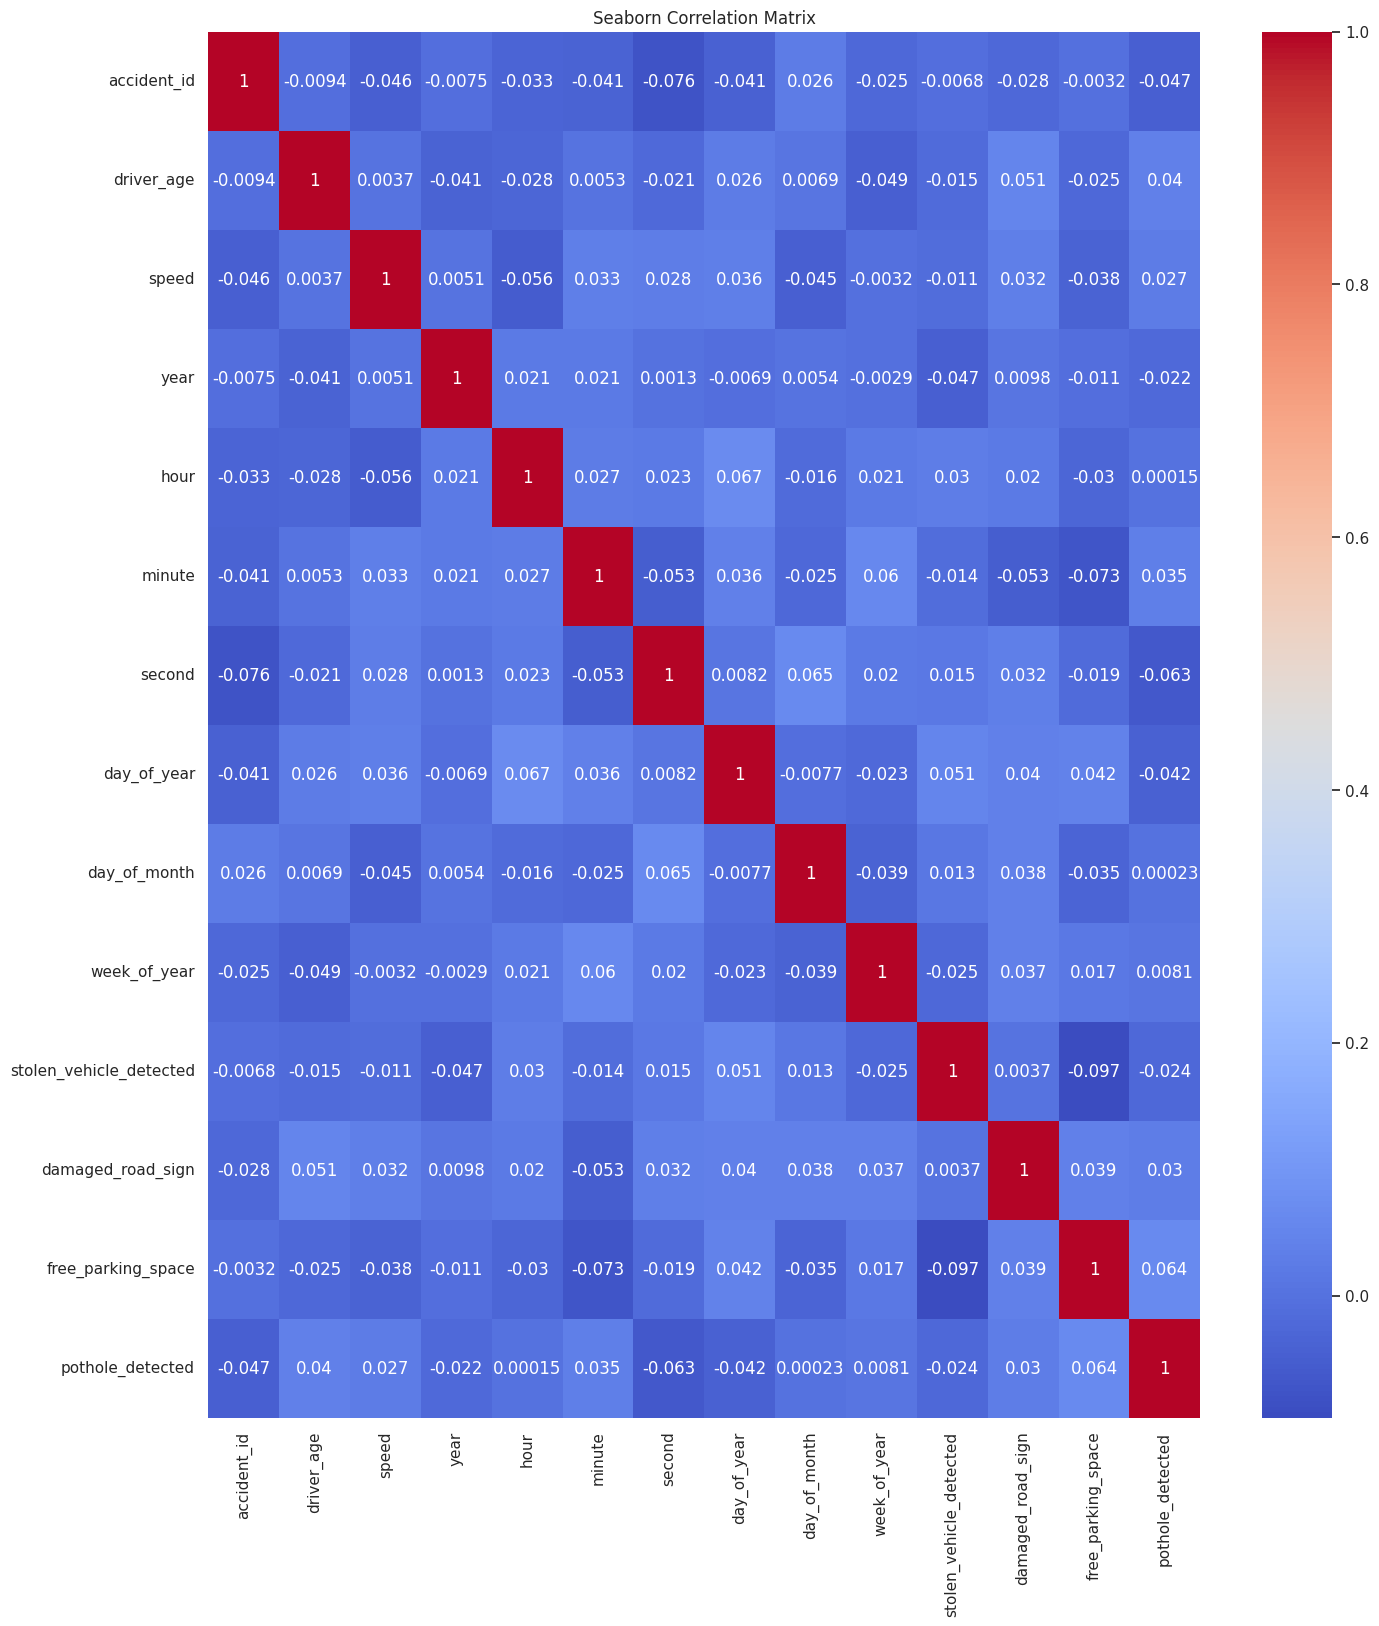

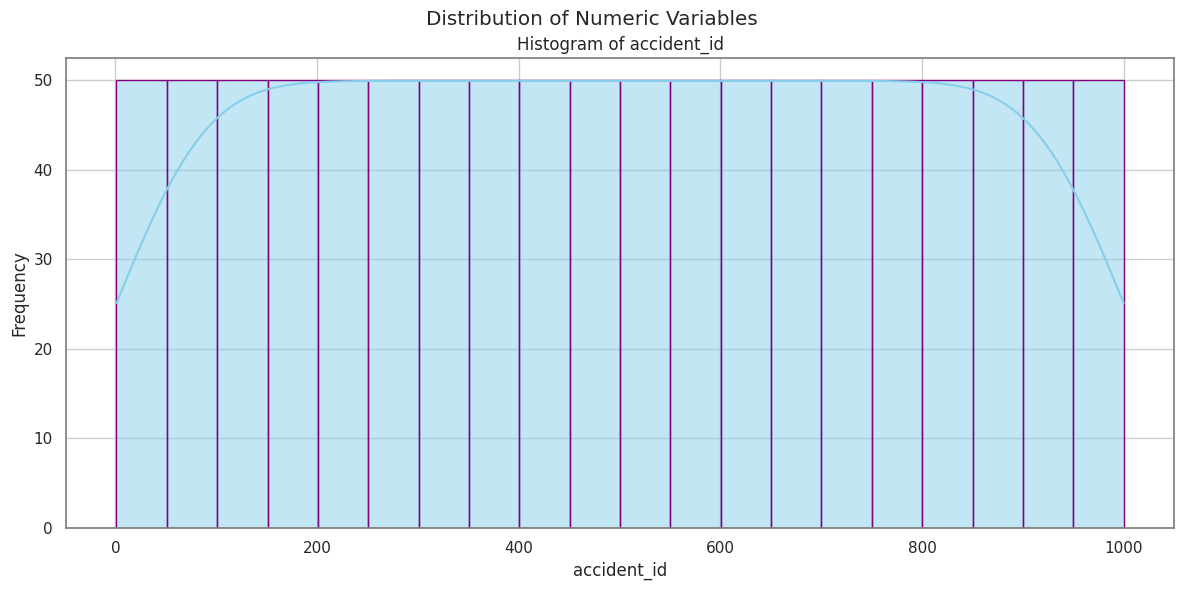

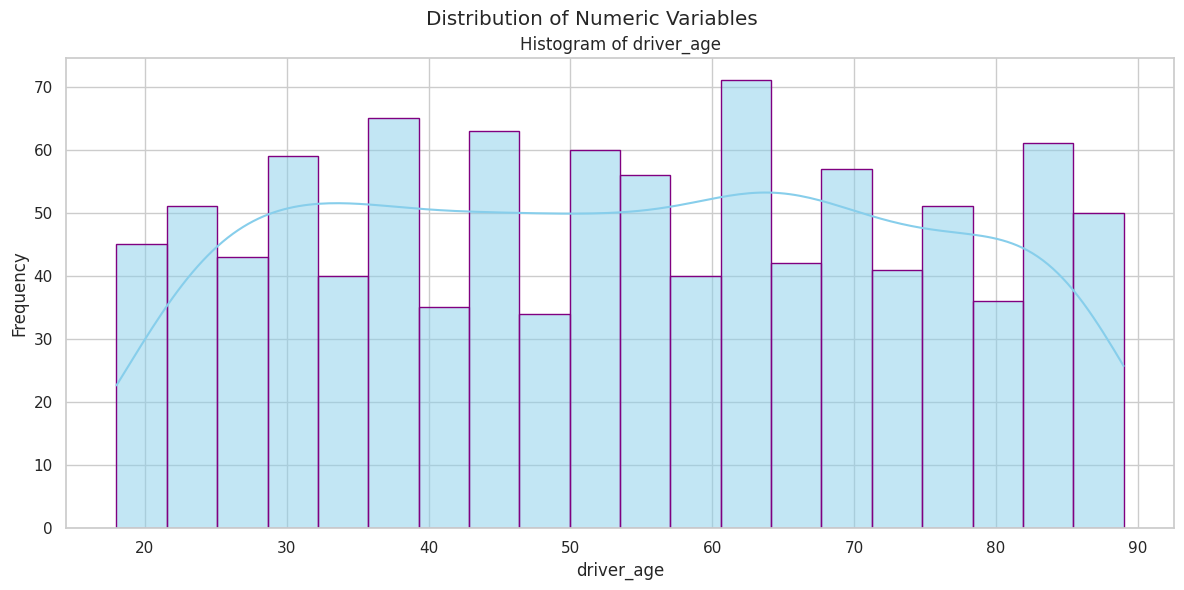

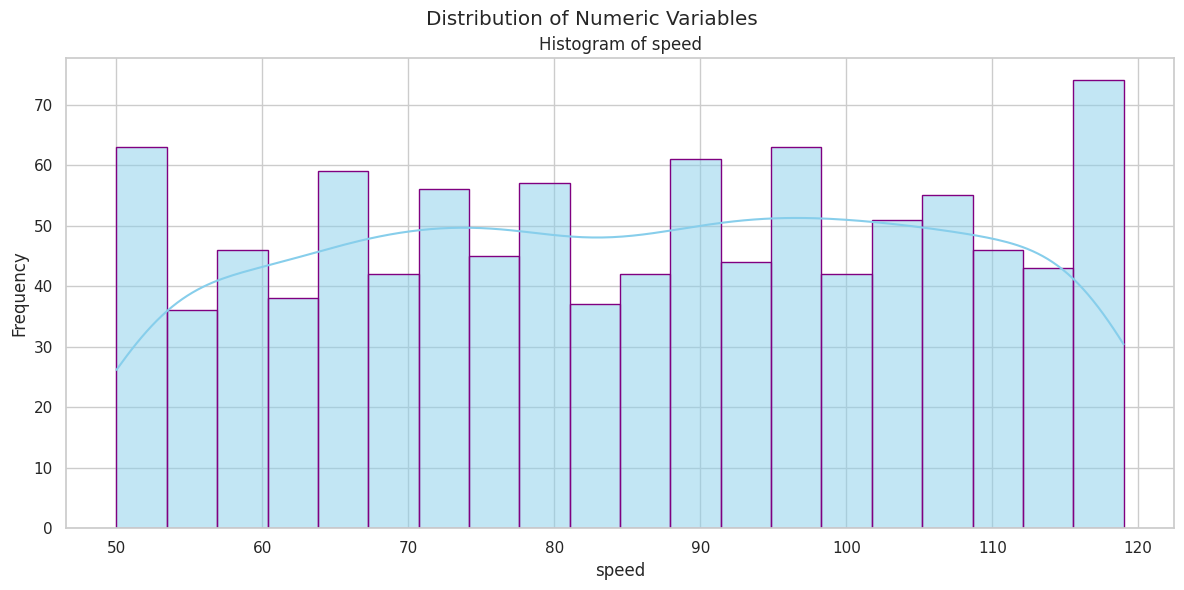

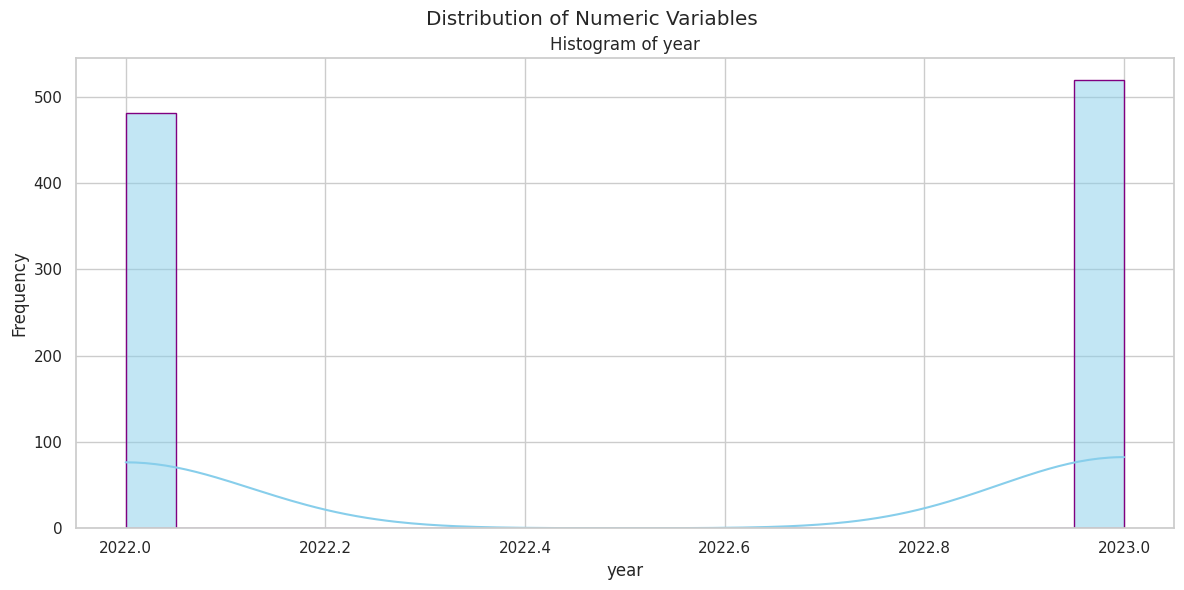

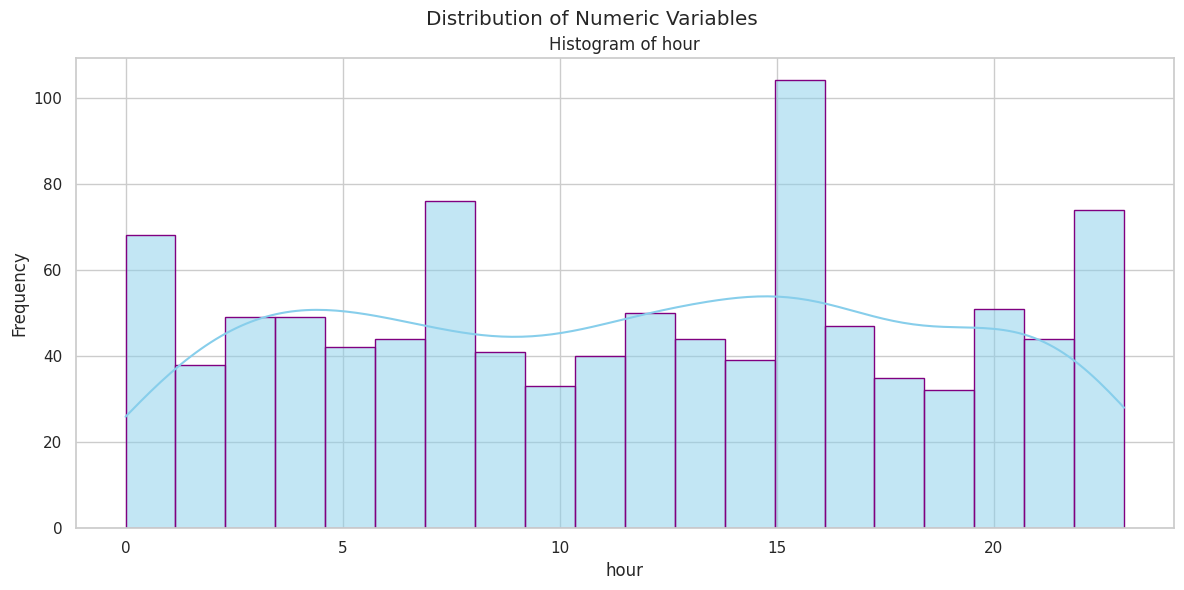

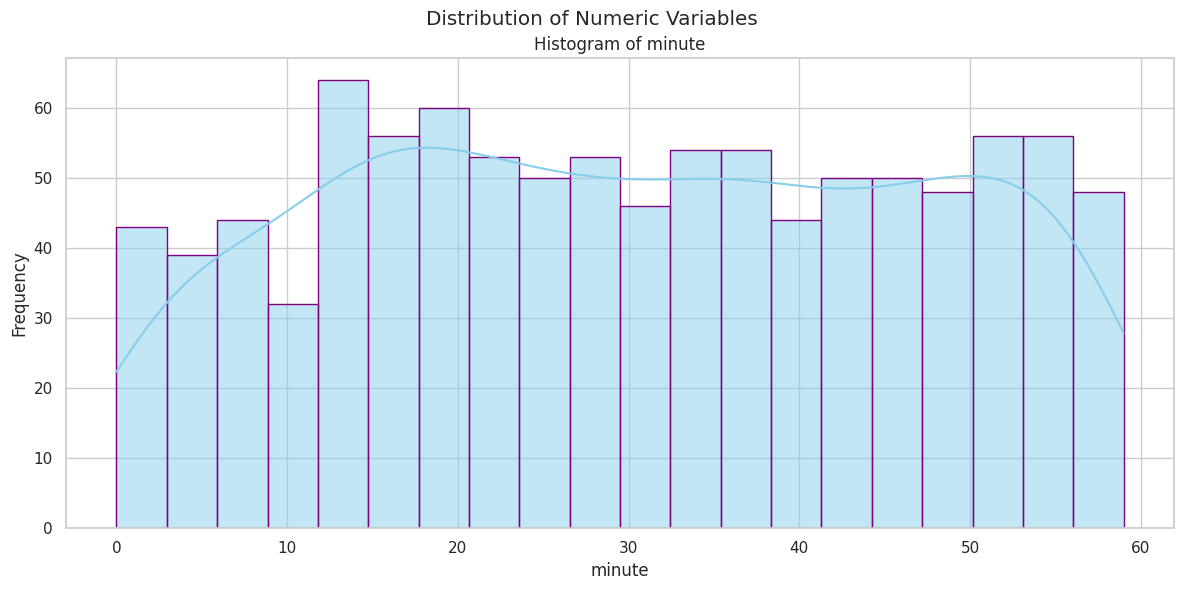

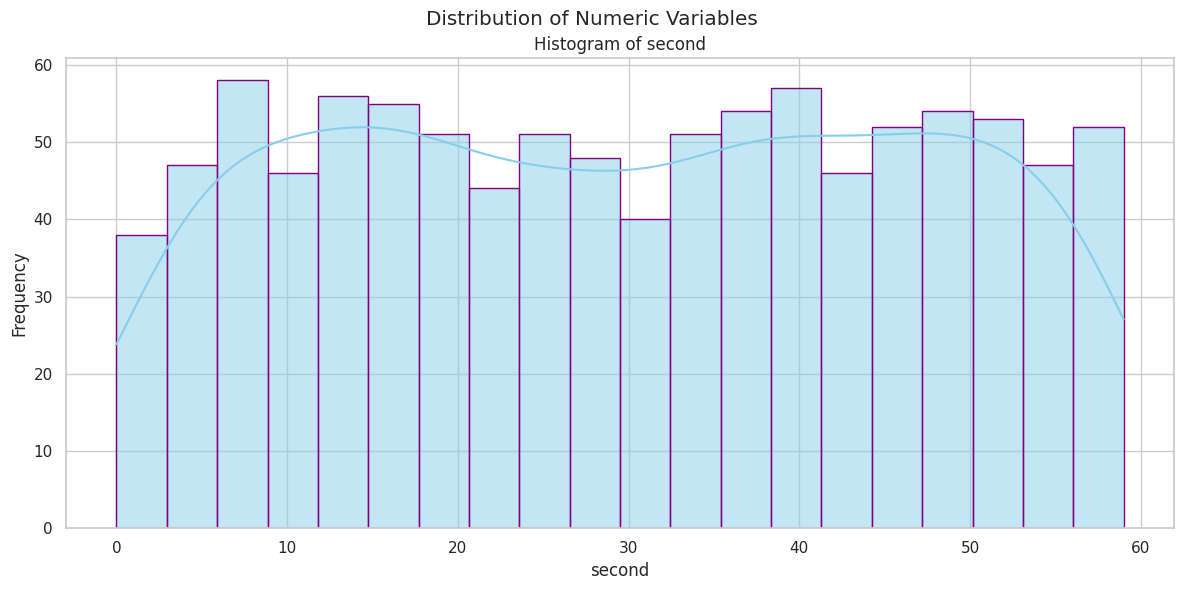

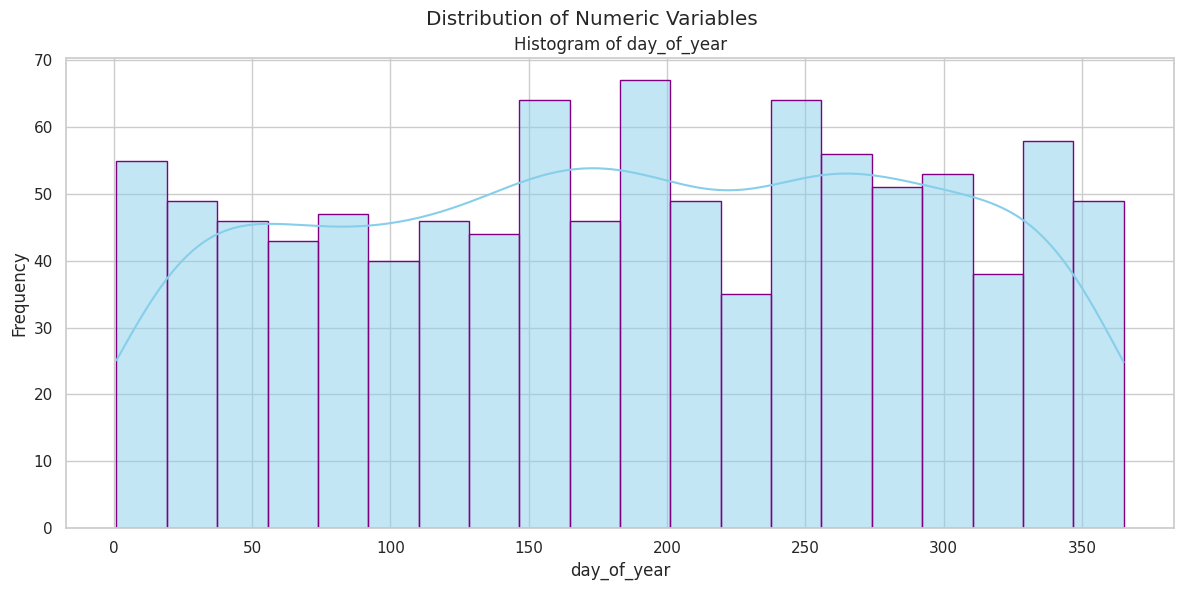

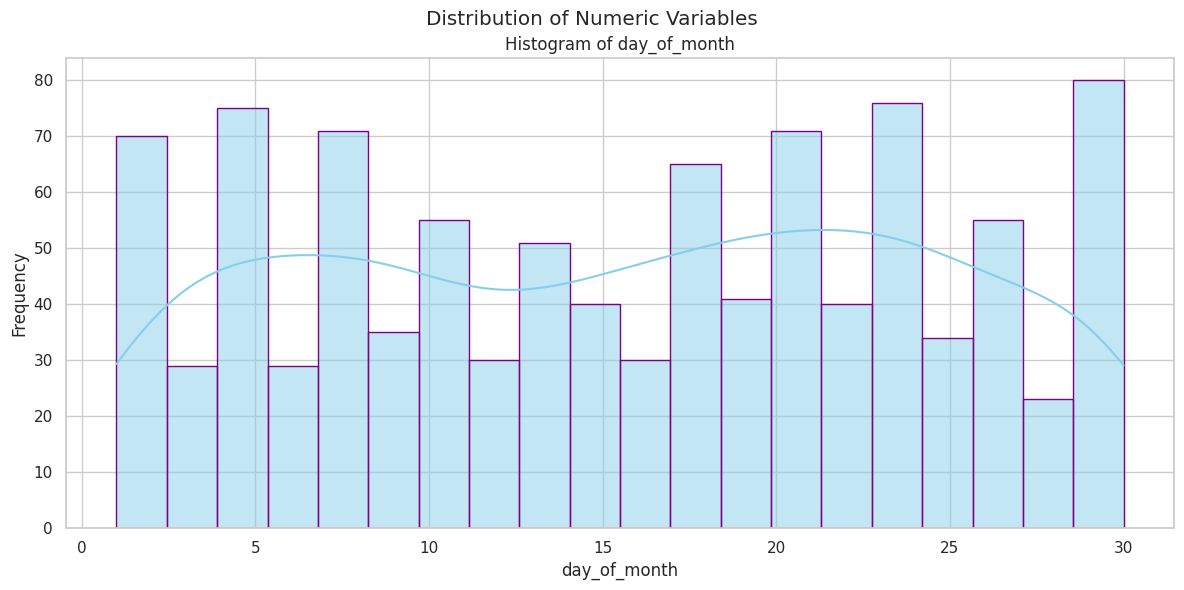

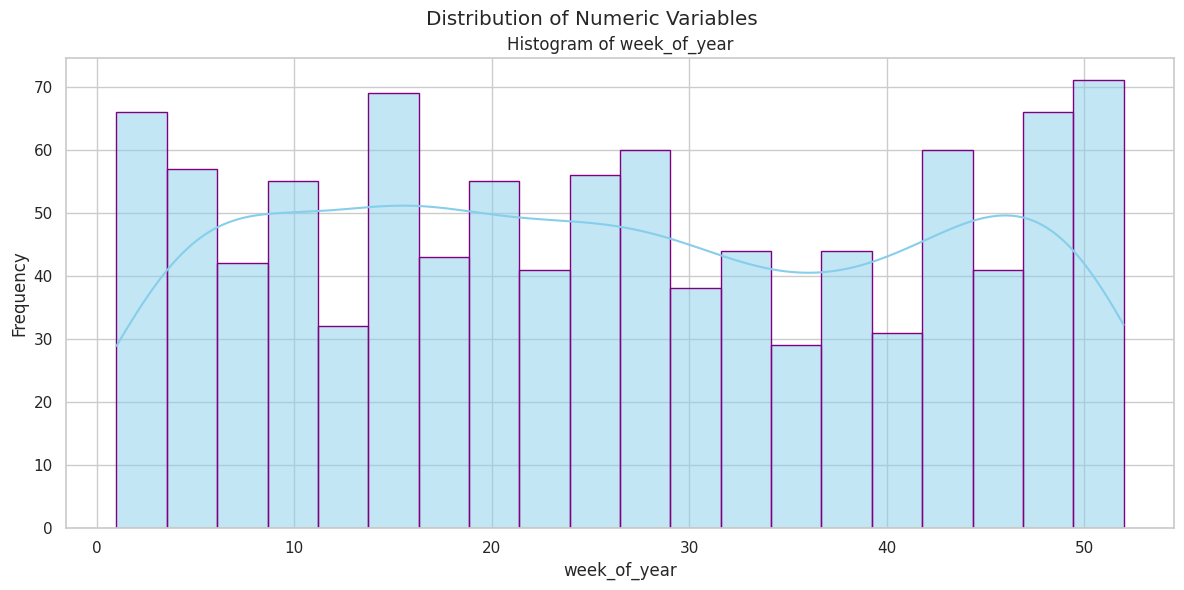

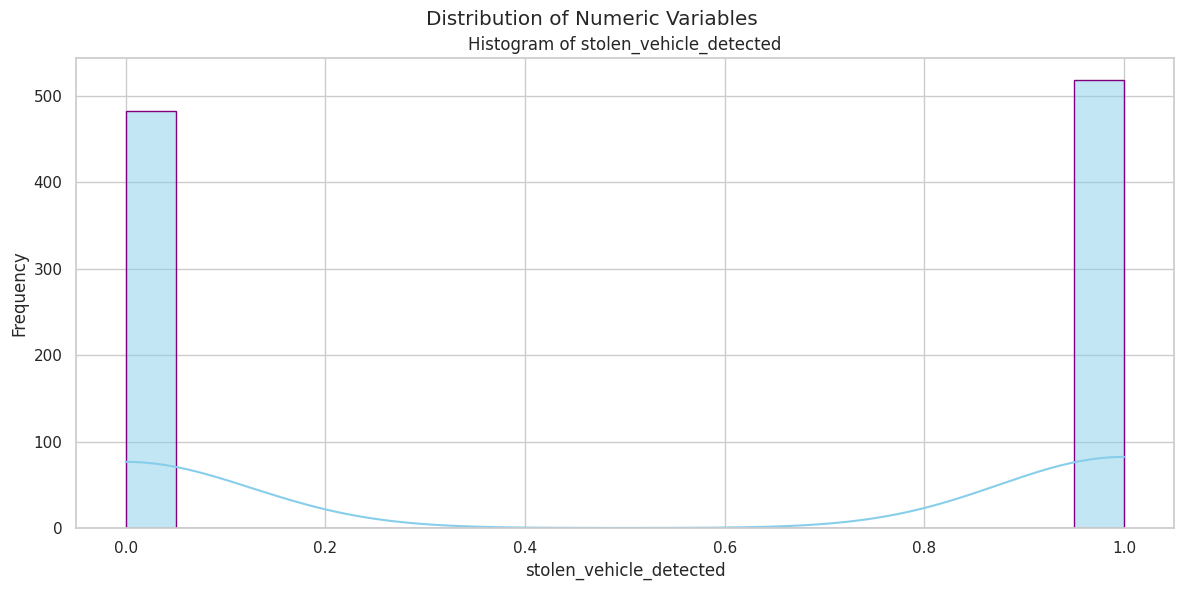

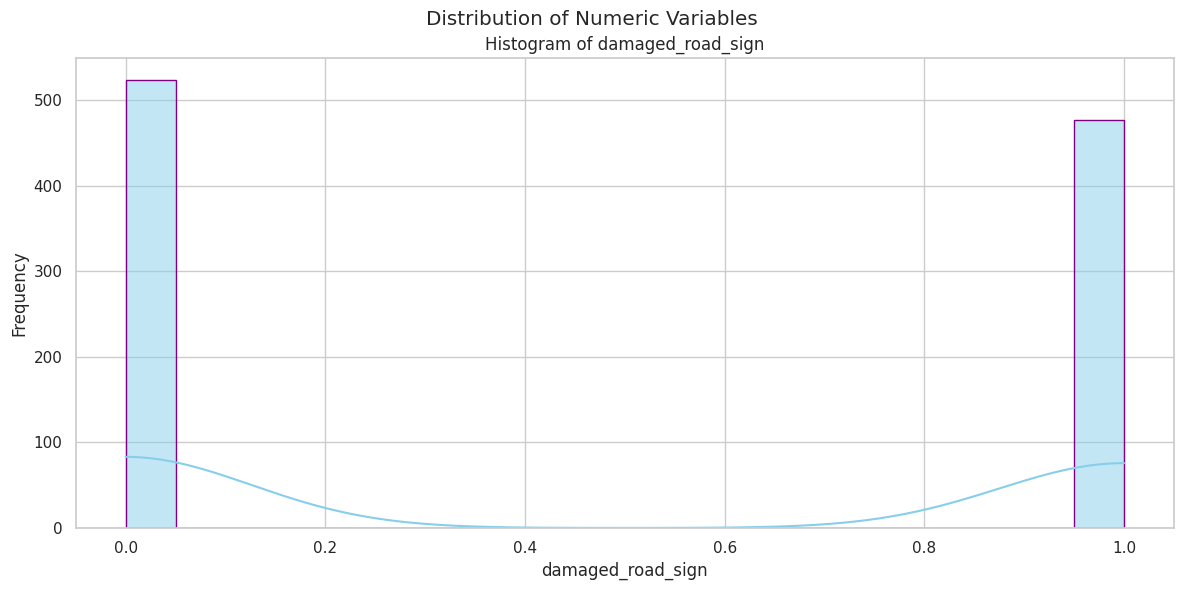

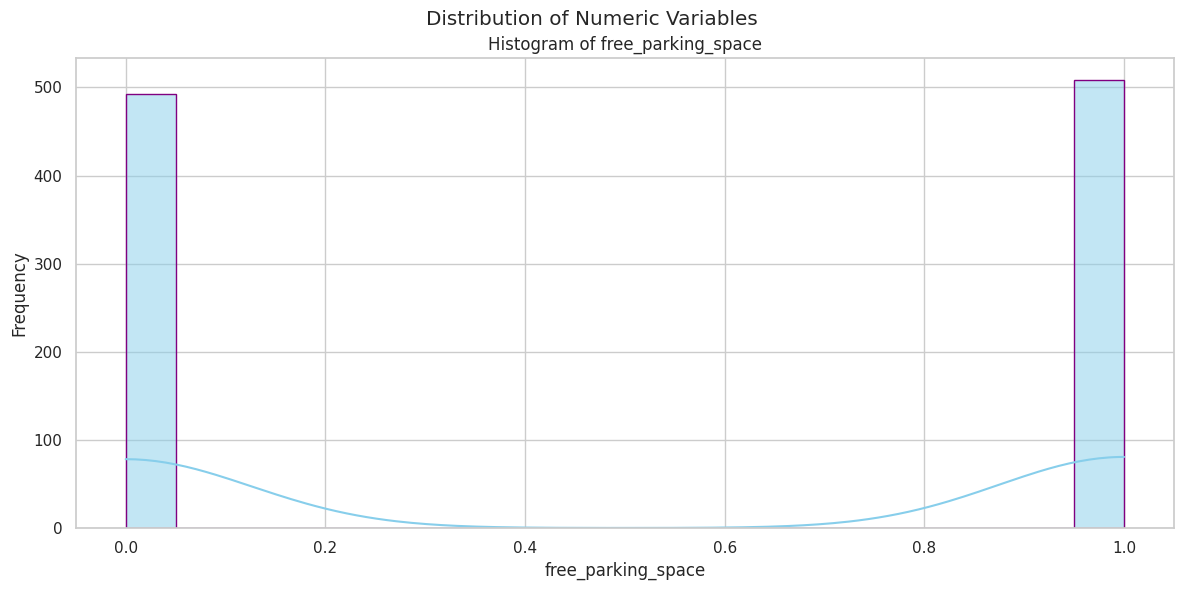

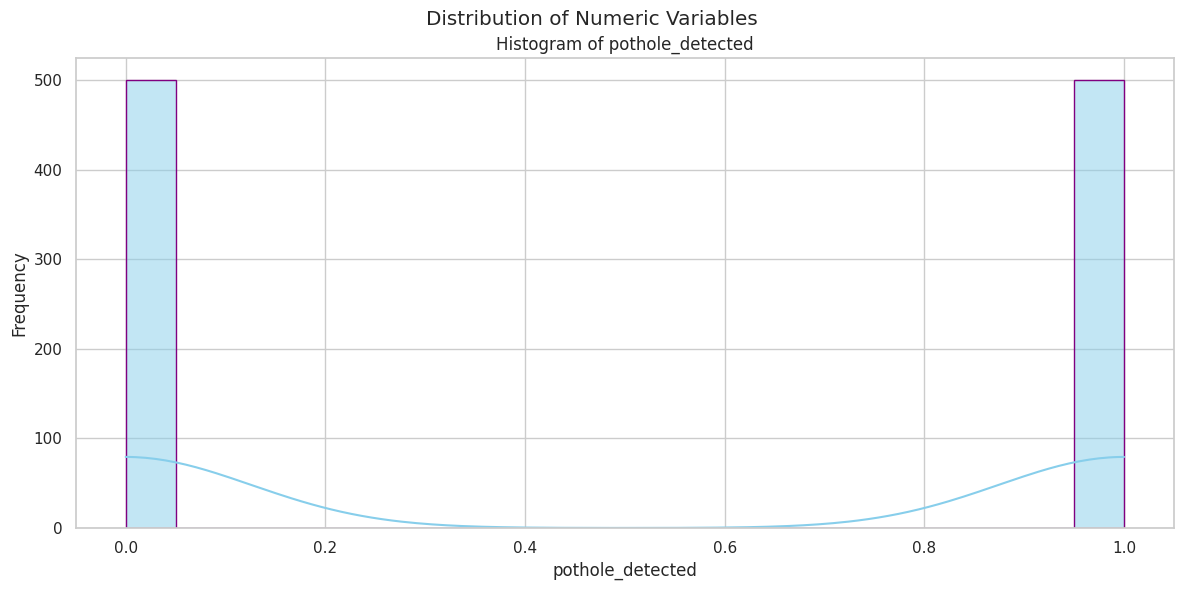

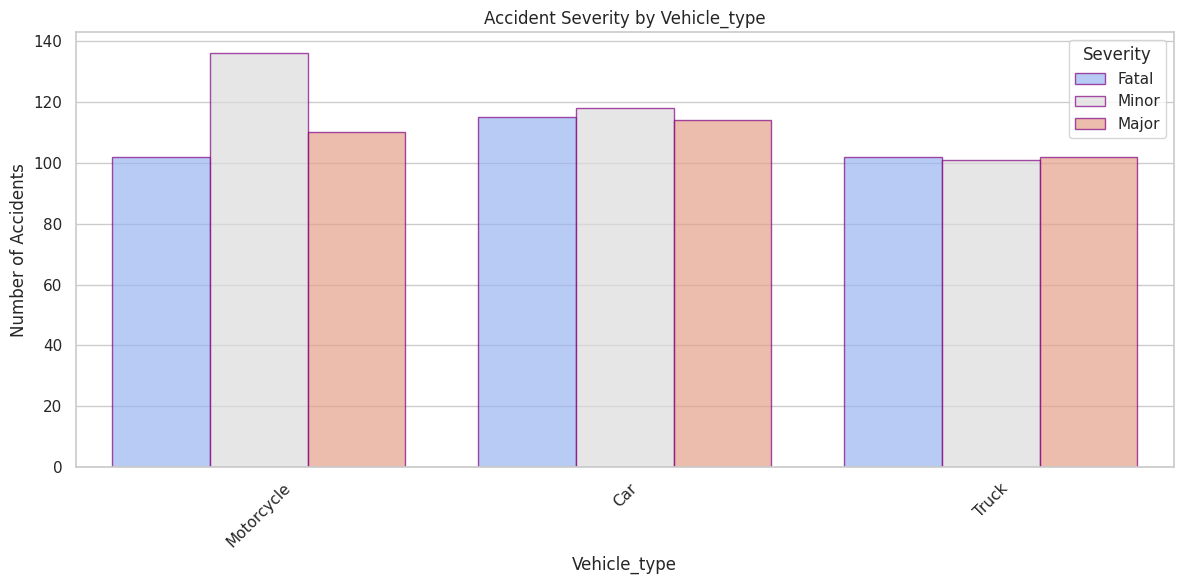

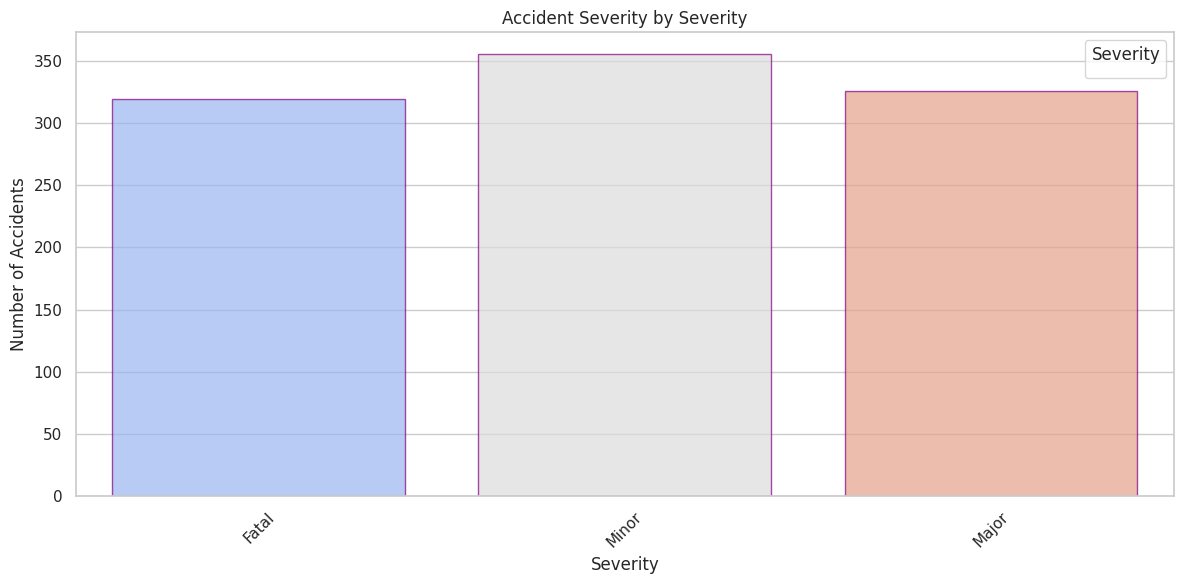

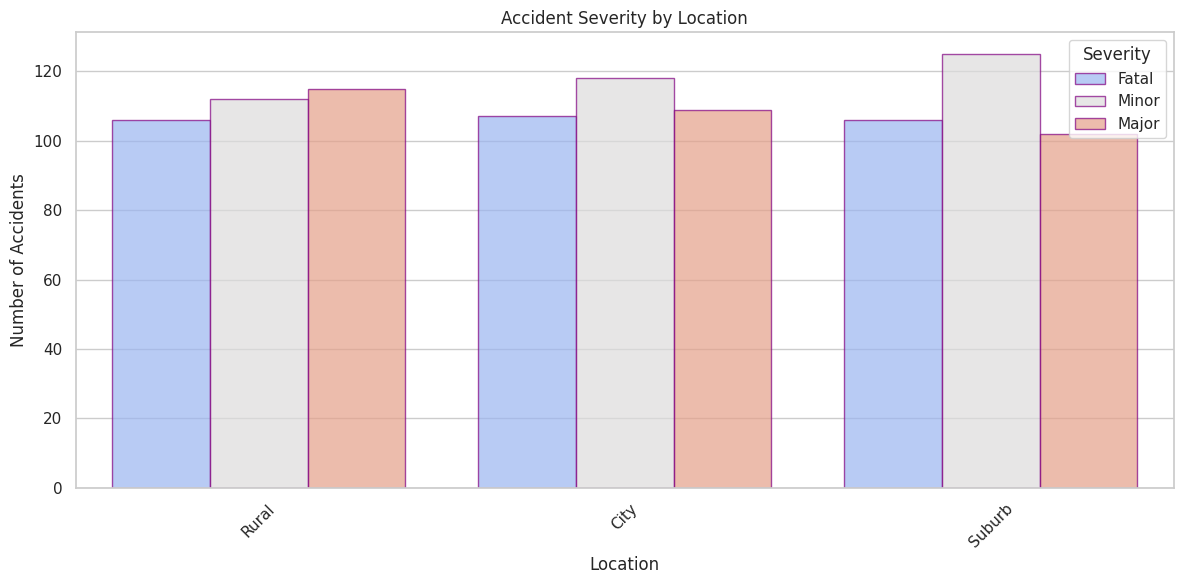

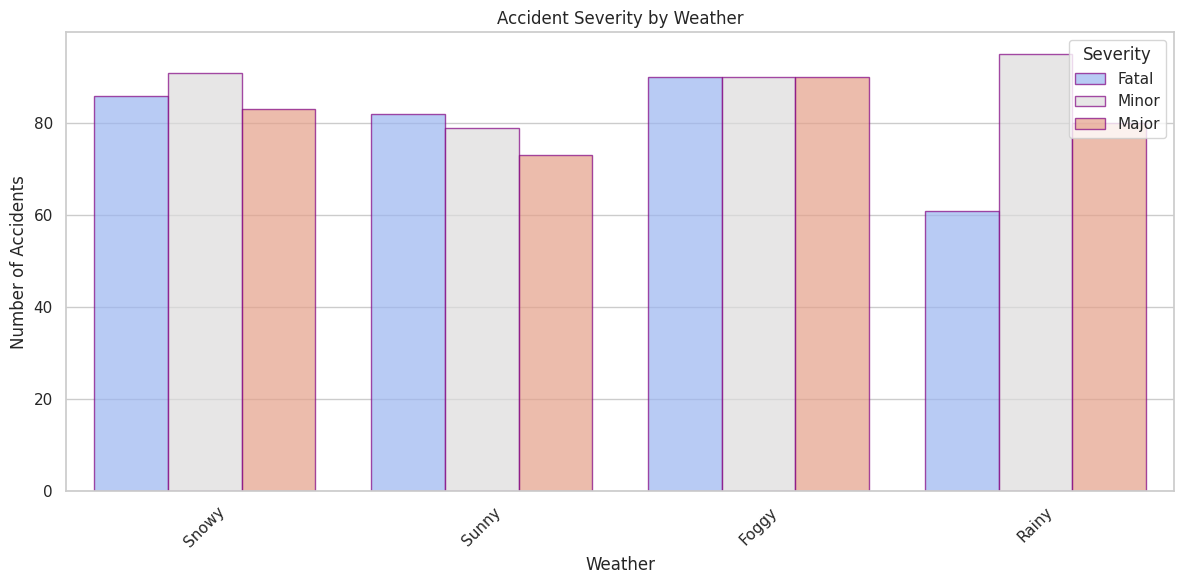

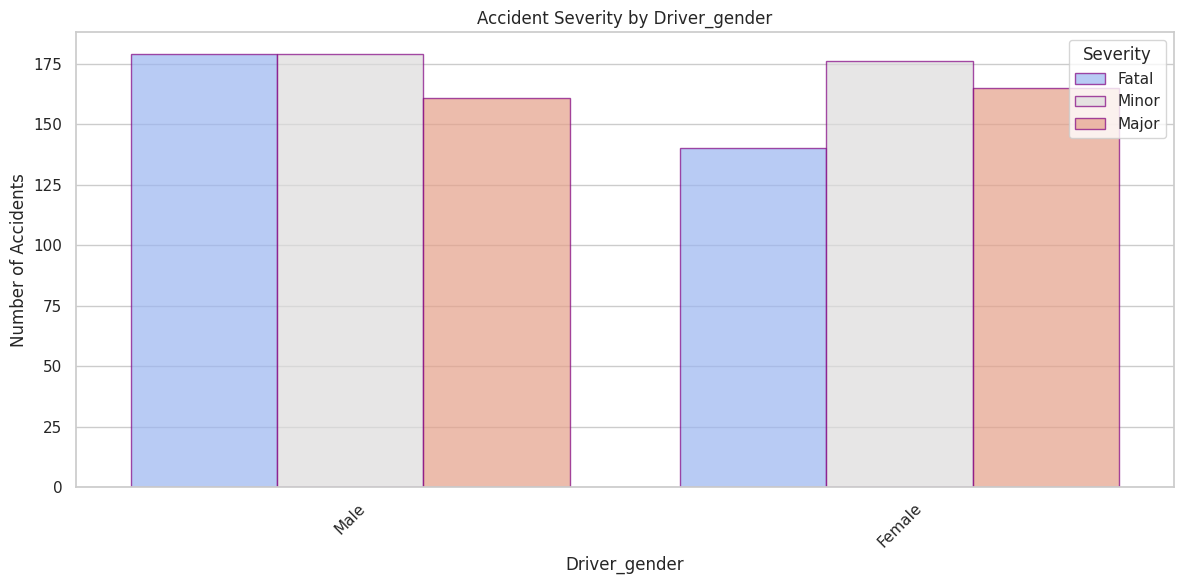

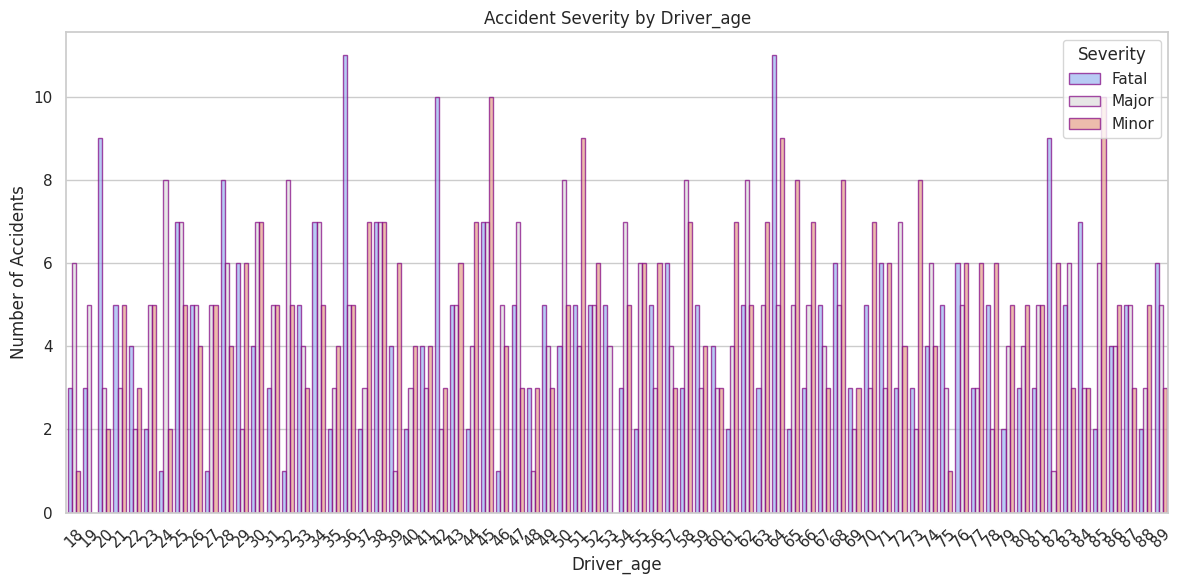

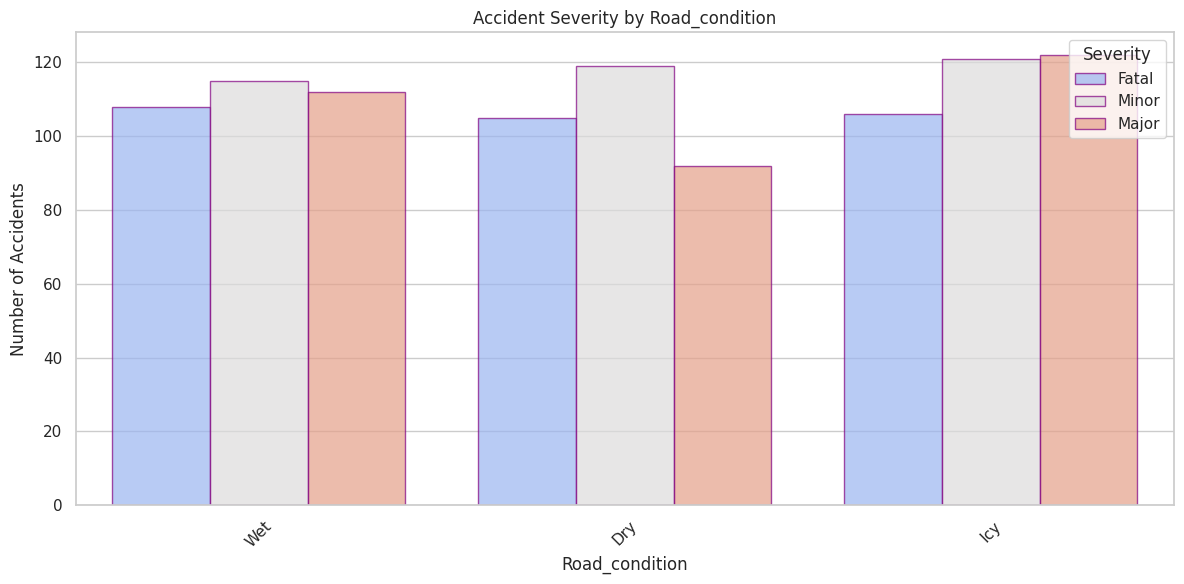

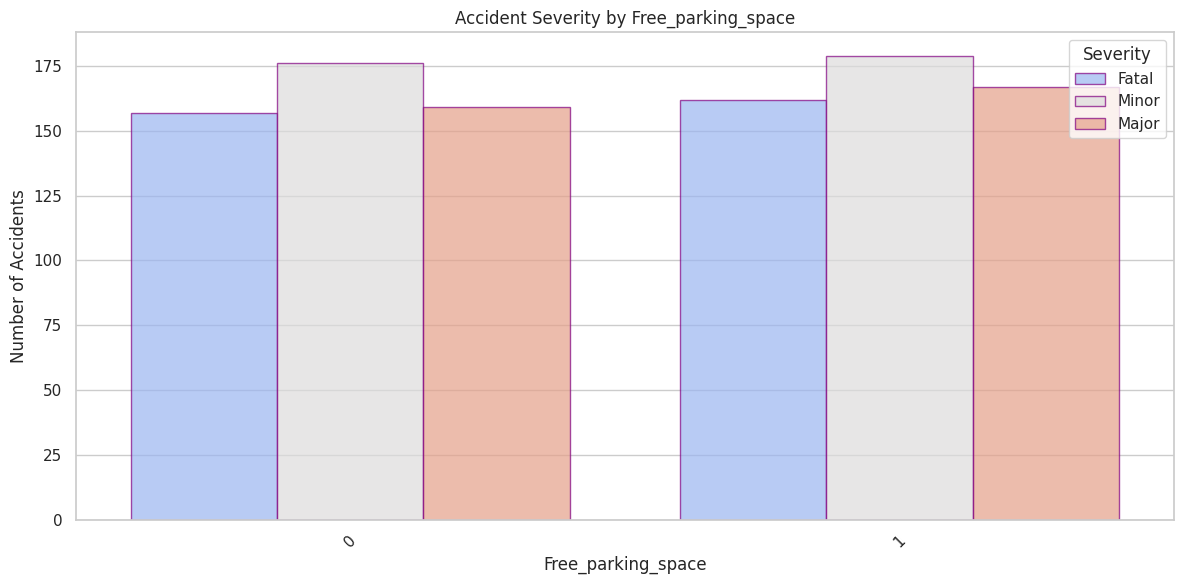

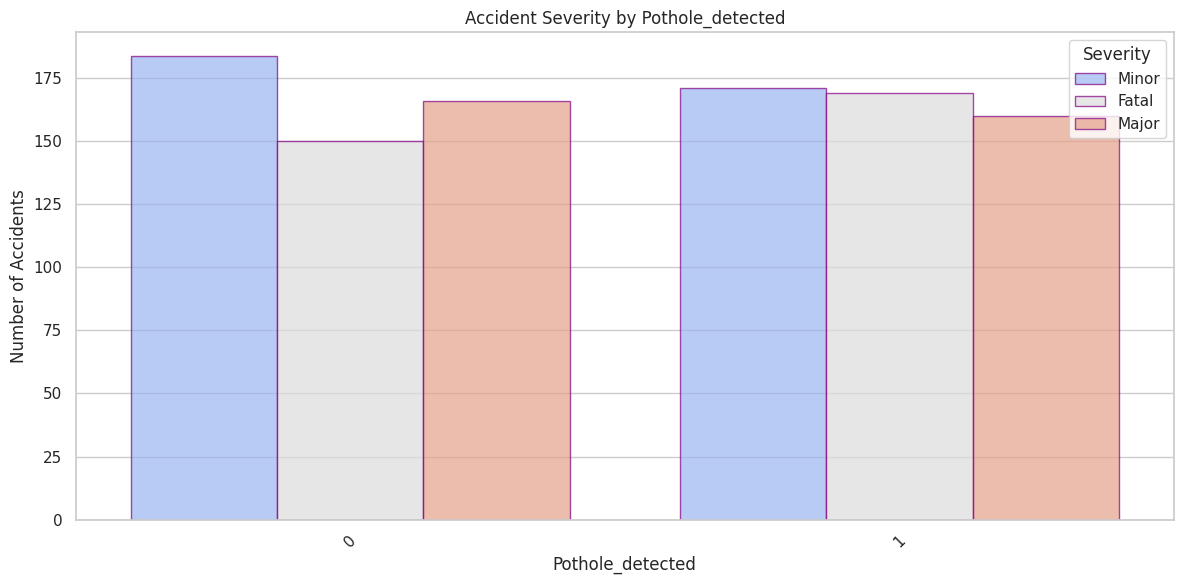

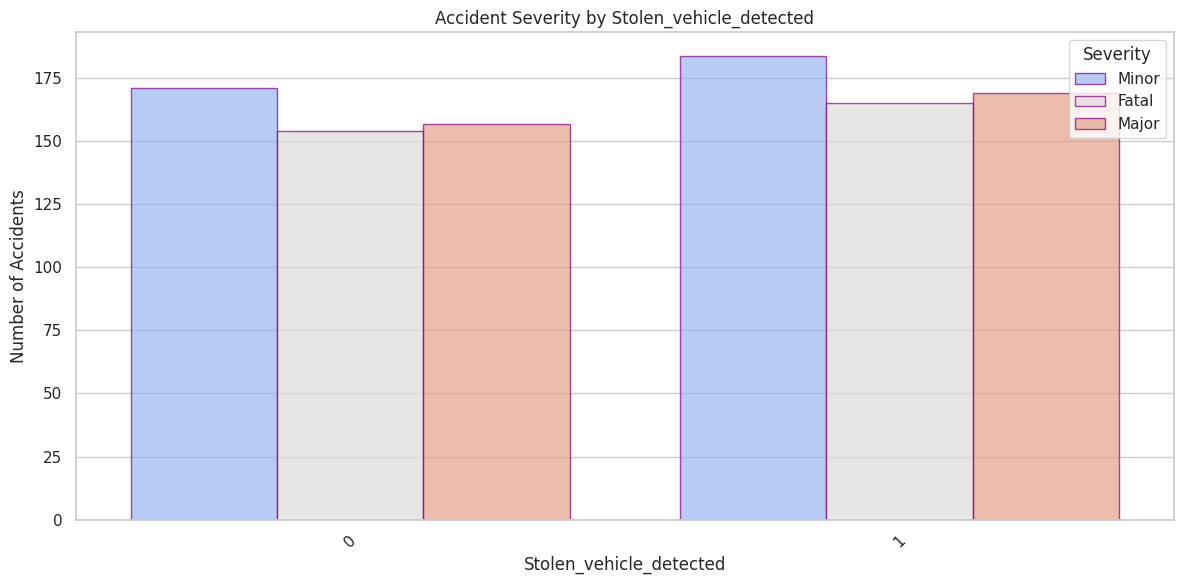

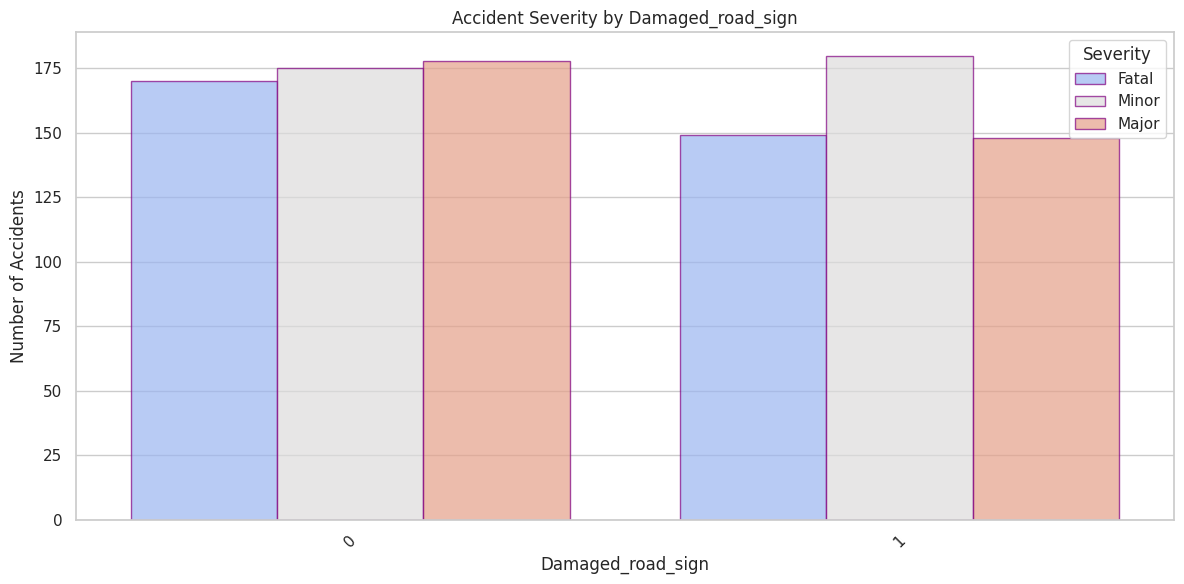

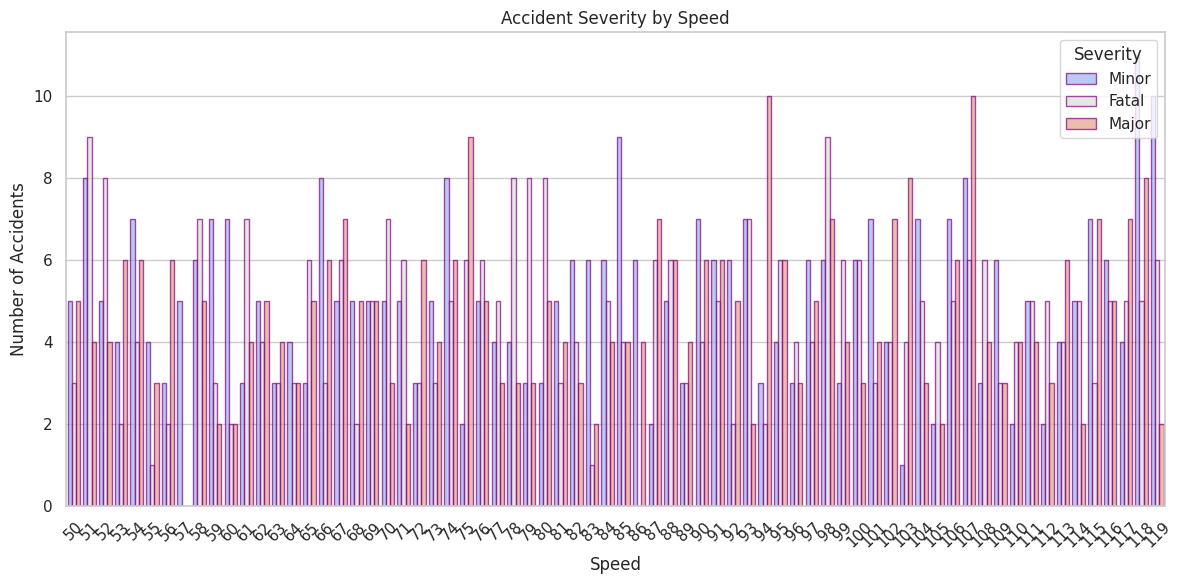

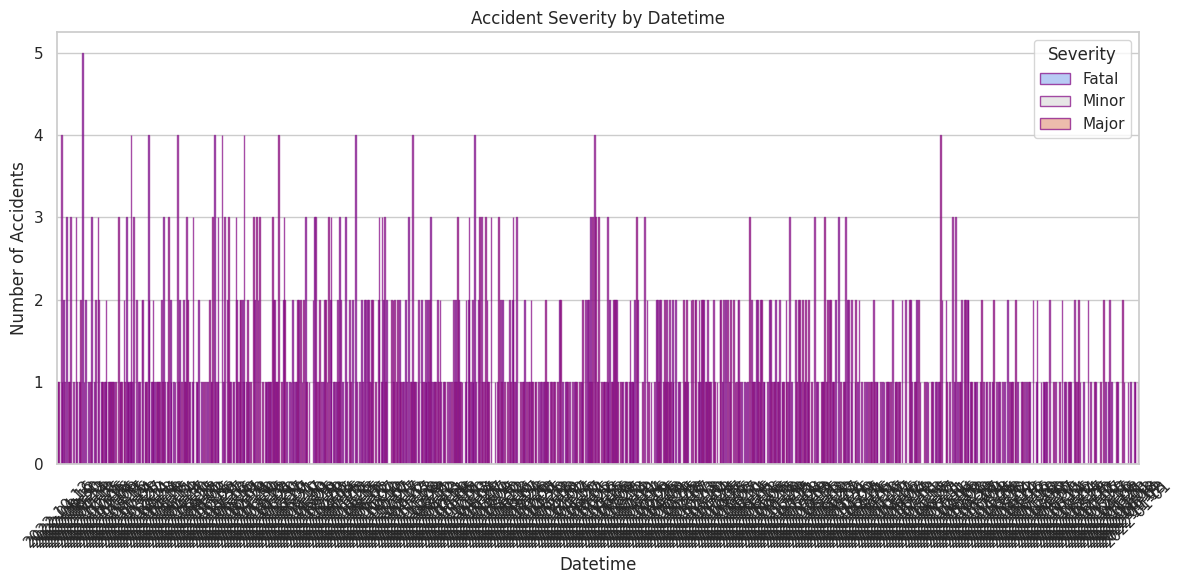

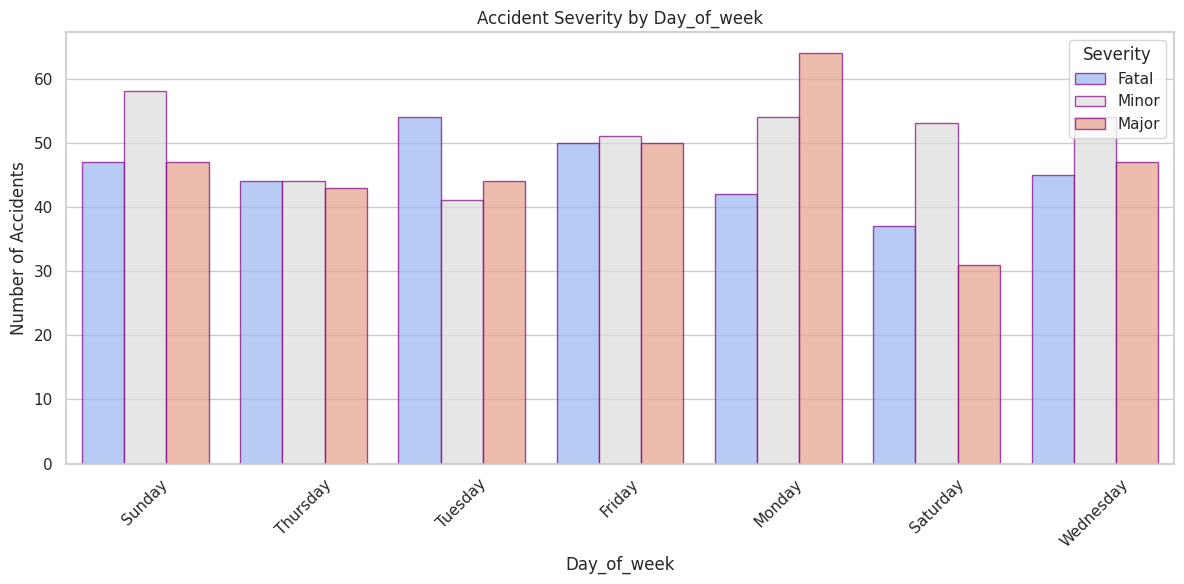

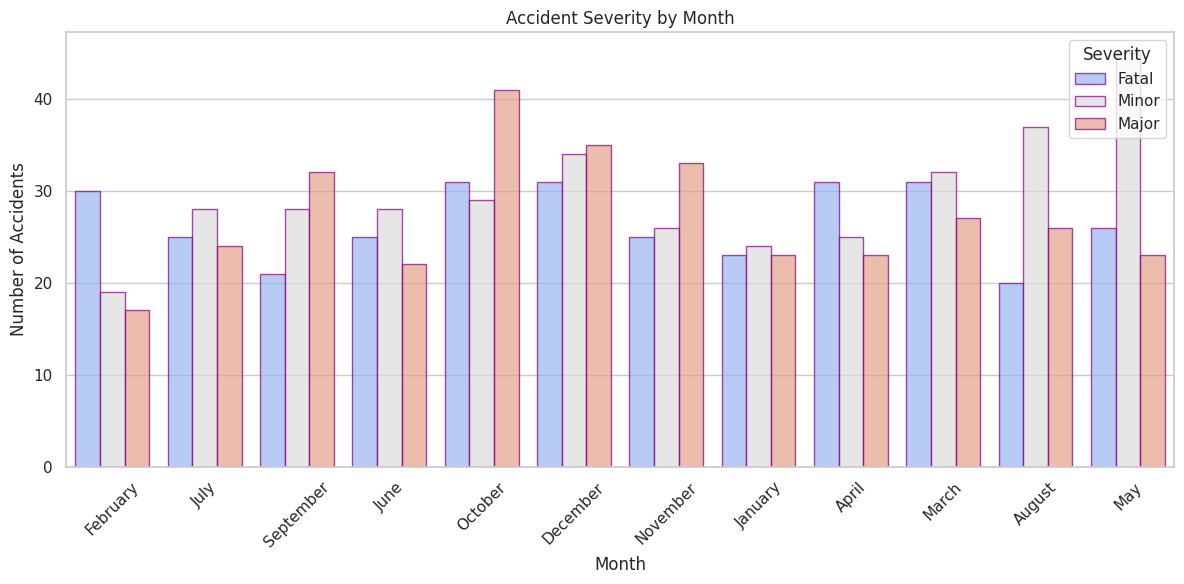

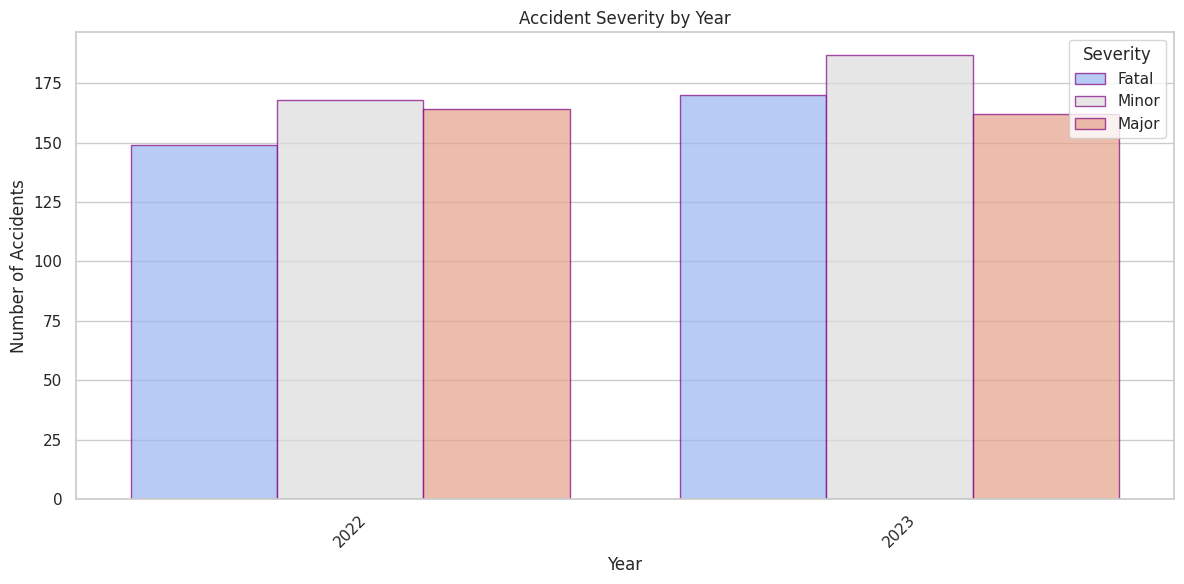

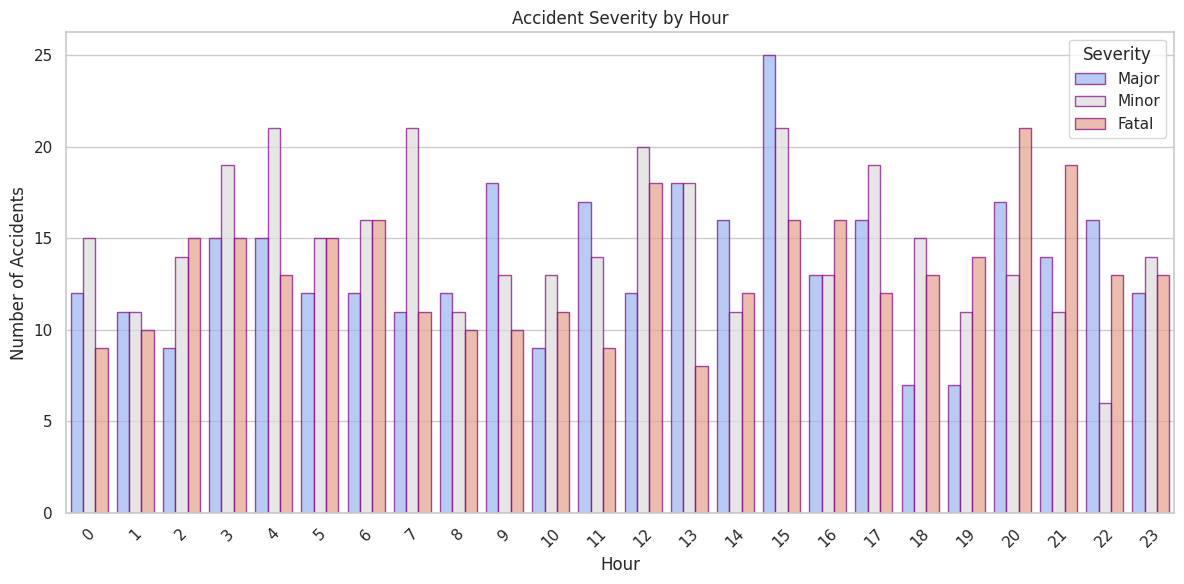

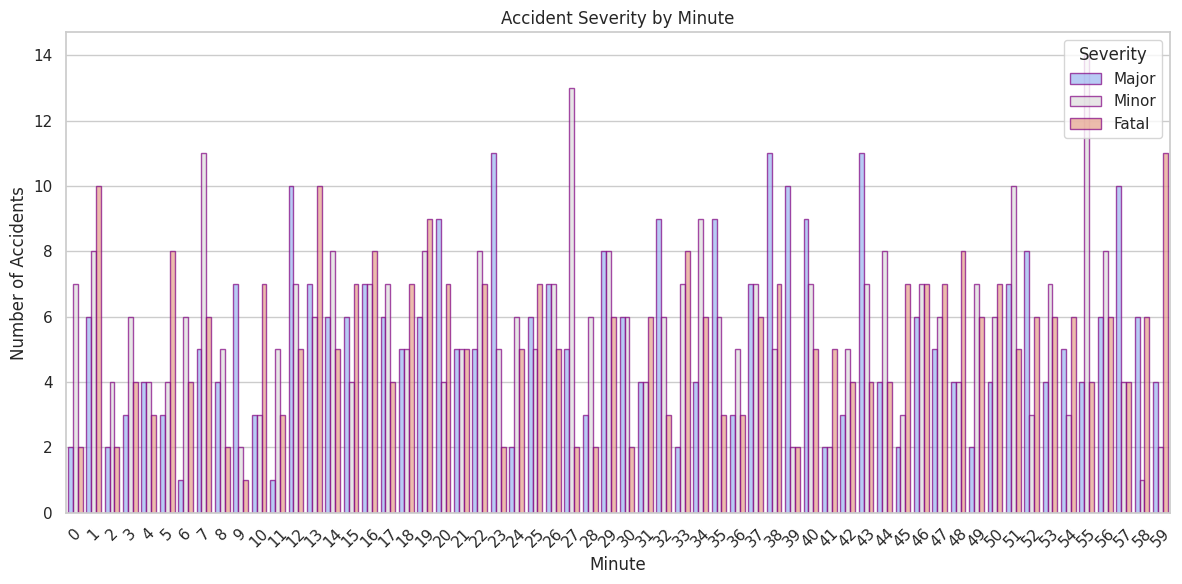

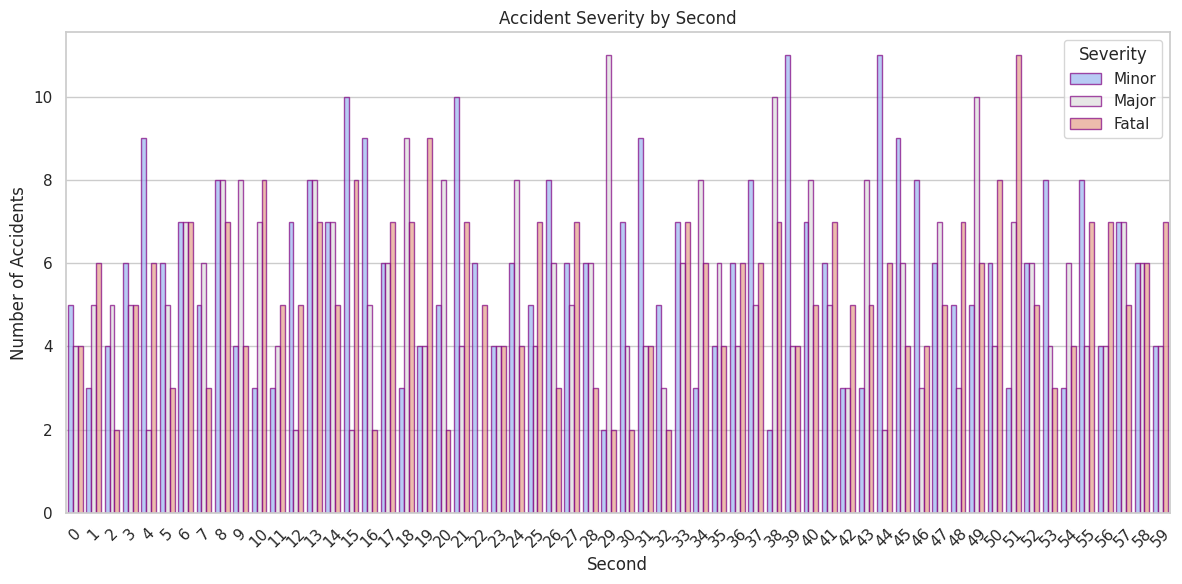

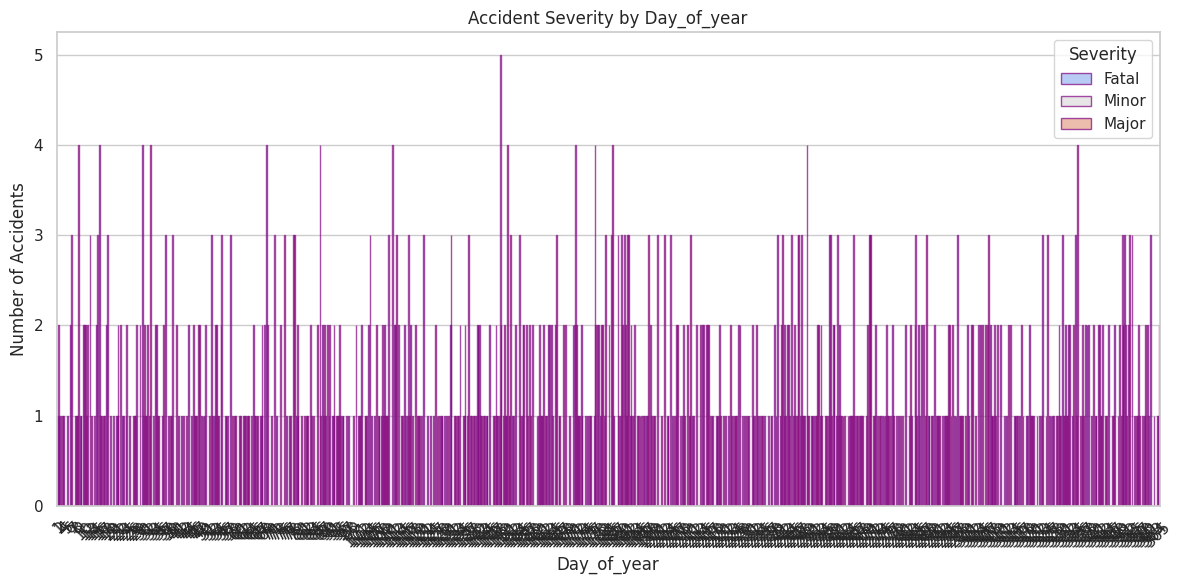

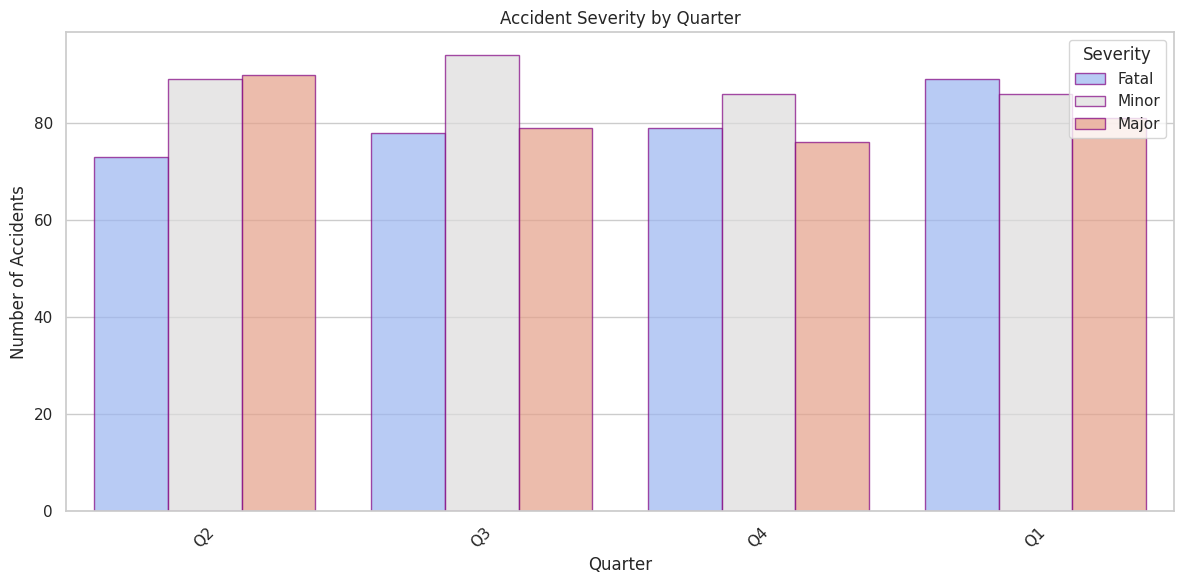

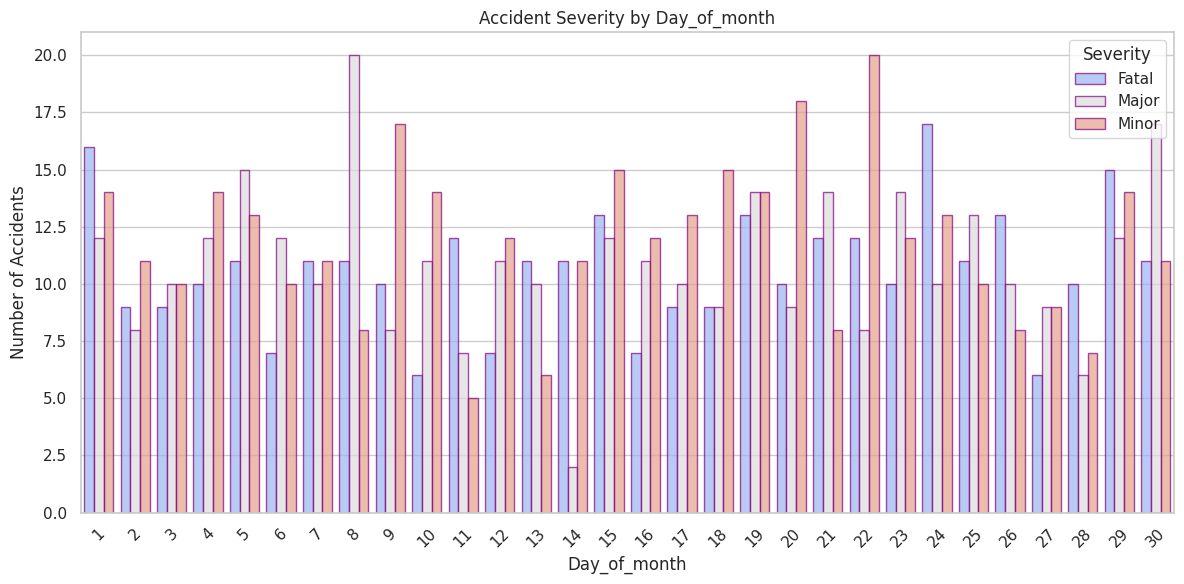

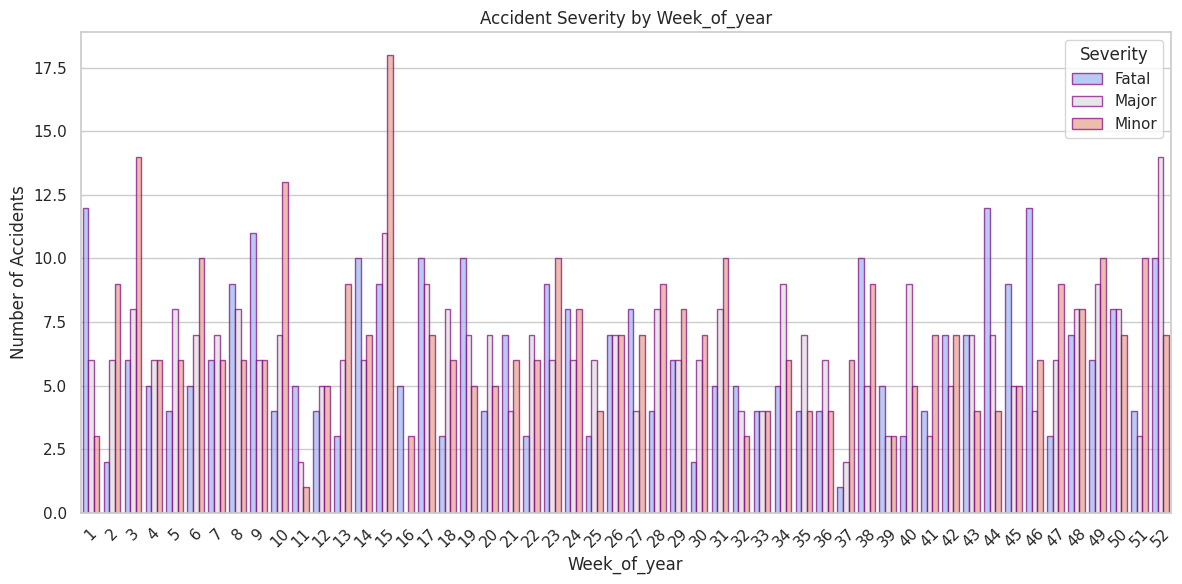

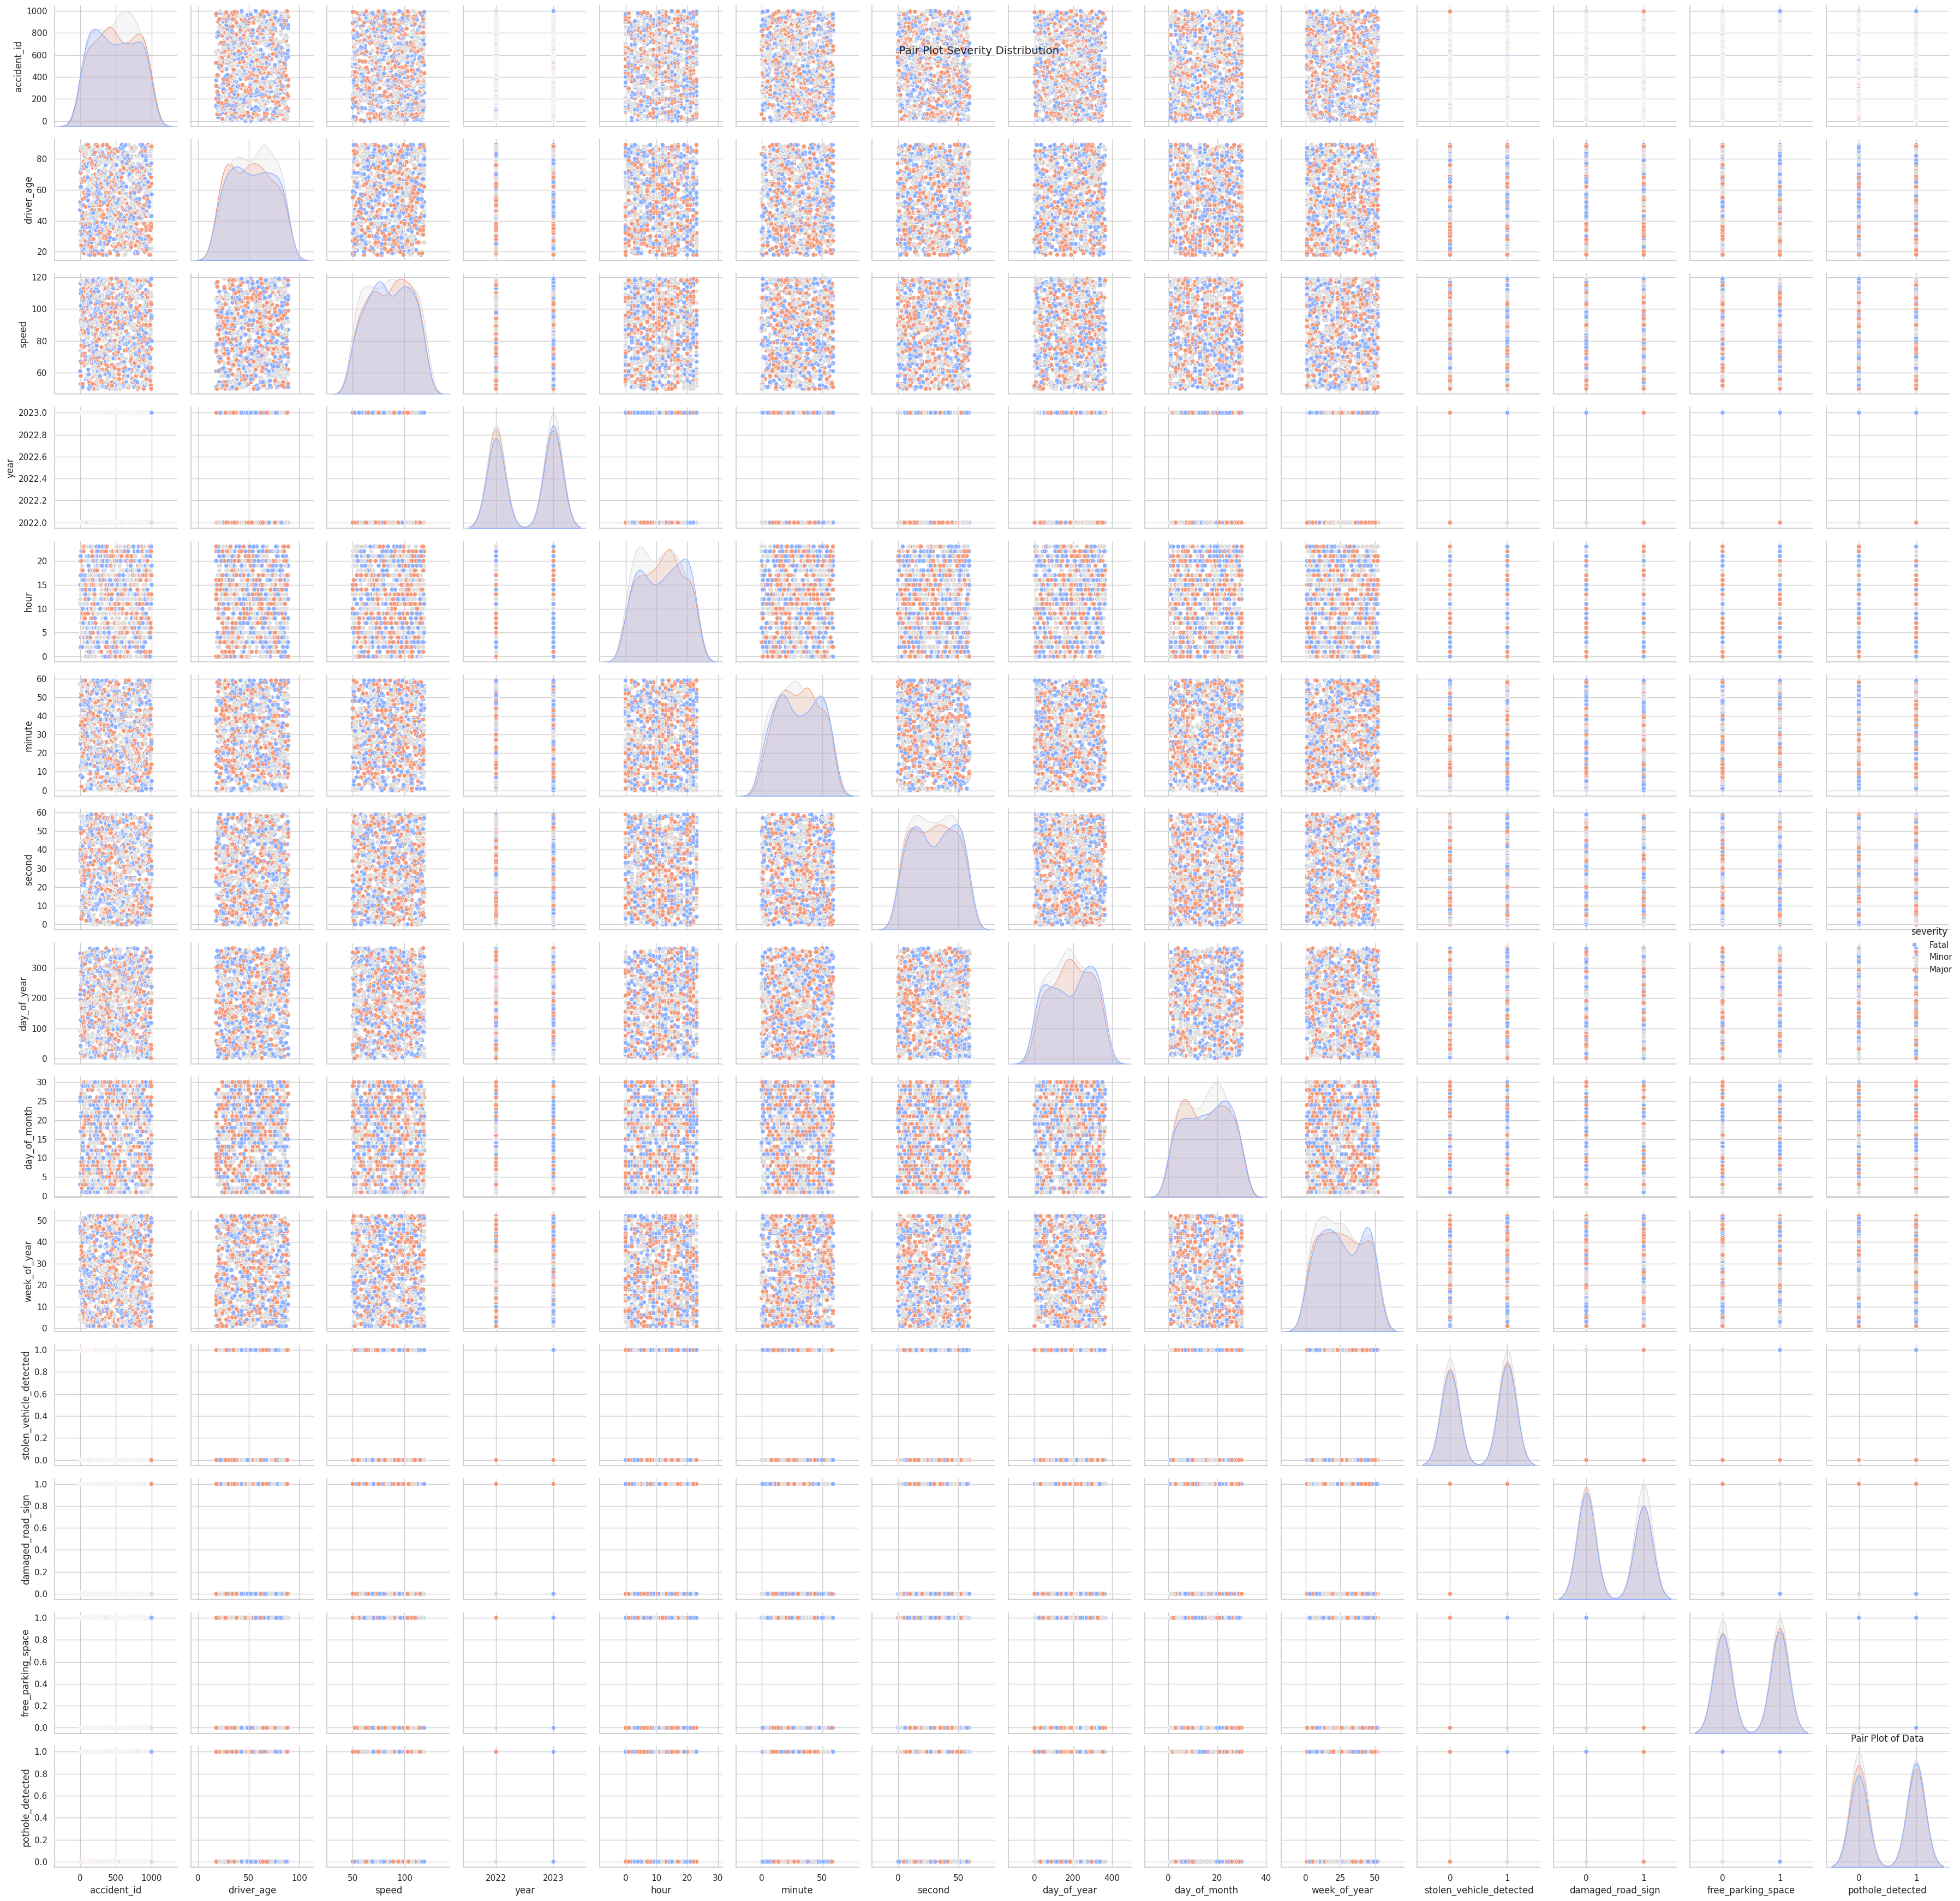

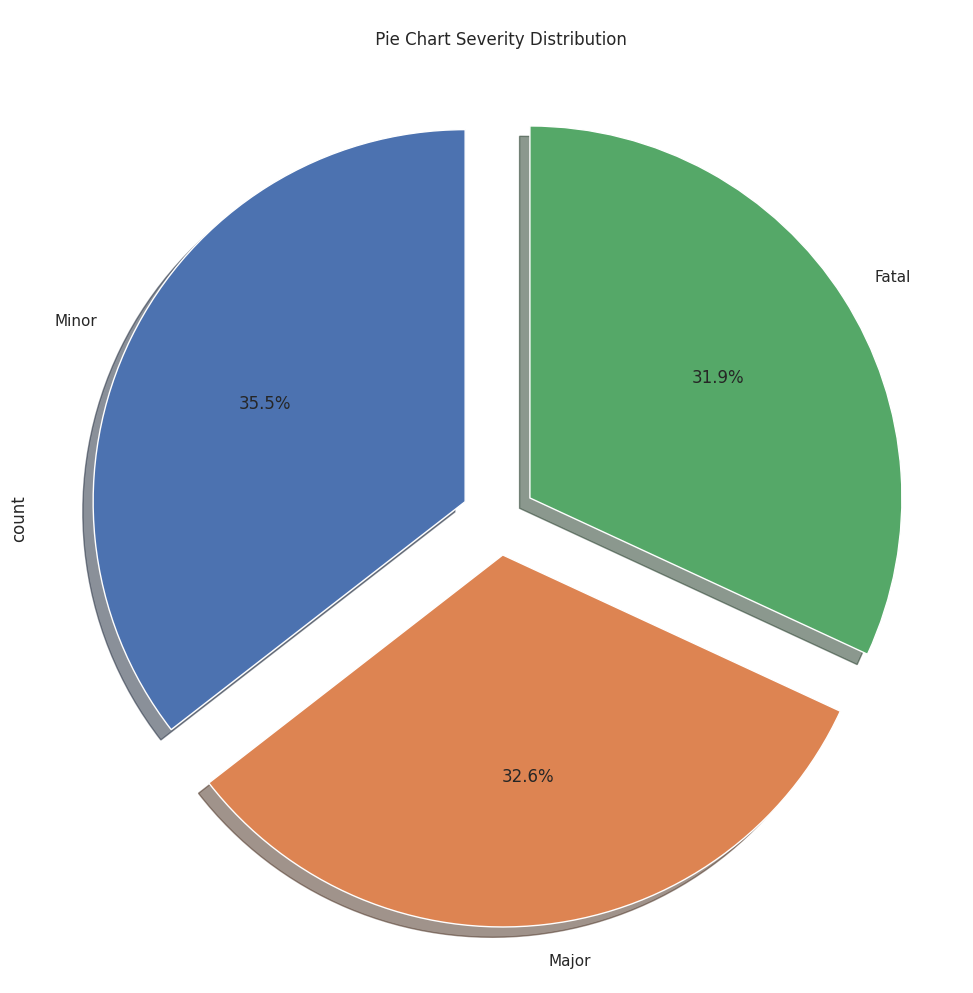

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, imageio, kaleido
import plotly.graph_objects as go
from google.colab import drive
from google.colab import files
import os

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load cleaned data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_accident_data.csv')
fig = px.histogram(df, x=df.columns[0])  # Assuming you want to plot the first column for simplicity

# Path to save the image
image_path = '/content/drive/MyDrive/Colab Notebooks/histogram.png'

# Filter numeric data
numeric_df = df.select_dtypes(include=['number'])

# Handle warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Preprocess Data
df.drop_duplicates(inplace=True)
df.ffill().bfill().dropna(inplace=True)

if 'date' in df.columns and 'time' in df.columns:
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    df.drop(['date', 'time'], axis=1, inplace=True)
    print("Datetime column created.")


# Setting plot aesthetics for seaborn
sns.set(style='whitegrid')
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'figure.dpi': 100,
    'axes.facecolor': 'white',
    'axes.edgecolor': 'gray',
    'axes.grid': True})

palette='coolwarm',
edgecolor = 'purple',
color = 'severity','skyblue', 'Correlation',
alpha = 0.8,
marker='o',
linestyle='--'

# Seaborn visualization for context before Plotly
plt.figure(figsize=(16, 18))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', edgecolor=edgecolor)
plt.title('Seaborn Correlation Matrix')
plt.show()


# Plotly correlation matrix
fig = px.imshow(
    numeric_df.corr(),
    text_auto=True,
    labels=dict(x="Features", y="Features", edgecolor=edgecolor, color="Correlation", figsize=(16, 18)),
    x=numeric_df.columns,
    y=numeric_df.columns,
    title='Plotly Correlation Matrix',
    color_continuous_scale=px.colors.diverging.Tealrose
)

fig.update_xaxes(side="bottom")
fig.update_layout(coloraxis_showscale=True, width=950, height=1000)  # Adjust size here
fig.show()


# Histograms of Numeric Columns
for column in numeric_df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(numeric_df[column], bins=20, kde=True, color='skyblue', edgecolor='purple')
    sns.set_style('whitegrid', {'axes.grid': True})
    plt.tight_layout()
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.suptitle('Distribution of Numeric Variables')
    plt.subplots_adjust(top=0.9)
    plt.show()


# Histogram of numeric columns
for column in numeric_df.columns:
    fig = px.histogram(numeric_df, x=column, nbins=20,
                       opacity=0.8,
                       title=f'\n Histogram of {column}',
                       labels={column: column.capitalize()})
    fig.update_layout(xaxis_title=column.capitalize(), yaxis_title='Count', showlegend=True, coloraxis_showscale=True)
    fig.show()


# Function to plot various visualizations using Plotly
def plot_data(df, attributes, plot_type='histogram'):
    for attribute in attributes:
        if df[attribute].dtype == 'object' or attribute in ['severity']:
            fig = px.histogram(df, x=attribute, color='severity', title=f'\n Accident Severity by {attribute.capitalize()}', labels={attribute: attribute.capitalize(), 'count': 'Count'}, opacity=0.8, barmode='overlay')
        else:
            fig = px.histogram(df, x=attribute, title=f'\n Distribution of {attribute.capitalize()}')
        fig.update_layout(xaxis_title=attribute.capitalize(), yaxis_title='Count', showlegend=True, coloraxis_showscale=True)
        fig.show()


# Define categorical attributes for visualization
categorical_attributes = [
    'vehicle_type', 'severity', 'location', 'weather', 'driver_gender',
    'driver_age', 'road_condition', 'free_parking_space', 'pothole_detected',
    'stolen_vehicle_detected', 'damaged_road_sign', 'speed', 'datetime',
    'day_of_week', 'month', 'year', 'hour', 'minute', 'second',
    'day_of_year', 'quarter', 'day_of_month', 'week_of_year'
]

# Plot data function for categorical data using seaborn
def plot_data(df, attributes):
    for attribute in attributes:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=attribute, hue='severity', data=df, palette='coolwarm', edgecolor='purple', alpha=0.7)
        sns.set_style('whitegrid', {'axes.grid': True})
        plt.title(f'Accident Severity by {attribute.capitalize()}')
        plt.xlabel(attribute.capitalize())
        plt.ylabel('Number of Accidents')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.legend(title='Severity', loc='upper right')
        plt.show()

# Call the function to plot data
plot_data(df, categorical_attributes)


# Scatter plot for driver age vs speed
fig = px.scatter(df, x='driver_age', y='speed', color='severity',
                 title='Driver Age vs Speed by Severity',
                 labels={'driver_age': 'Driver Age', 'speed': 'Speed'},
                 opacity=0.8)
fig.show()


# Define the number of rows and columns for subplot layout based on the number of features
num_features = len(df.columns)
columns = 5  # Set a fixed number of columns or calculate based on your preferences
rows = (num_features + columns - 1) // columns  # Calculate rows needed to fit all plots

# Start subplots using Plotly
fig = make_subplots(rows=rows, cols=columns, subplot_titles=[col for col in df.columns])

# Mapping of DataFrame plot types to Plotly functions
plot_type_mapping = {
    'bar': px.bar,
    'barh': lambda data_frame, x, title: px.bar(data_frame, x=x, orientation='h', title=title),
    'line': px.line,
    'area': px.area,
    'box': px.box,
    'hist': px.histogram,
    'scatter': px.scatter
}

# Index tracker for subplots
subplot_index = 1

# Iterate over each column to plot according to its appropriate plot type
for column in df.columns:
    plot_type = 'box' if df[column].dtype in ['float64', 'int64'] else 'bar'
    current_plot = plot_type_mapping[plot_type](data_frame=df, x=column, color='severity', title=f'{column.capitalize()} Distribution')

    # Determine the row and column to place each subplot
    row = (subplot_index - 1) // columns + 1
    col = (subplot_index - 1) % columns + 1

    # Add trace to the respective subplot position
    for trace in current_plot.data:
        fig.add_trace(trace, row=row, col=col)
        subplot_index += 1

    # Prevent index out of range error
    if subplot_index > rows * columns:
        print("Warning: Not all columns fit in the grid")
        break
        subplot_index += 1

# Adjust layout and show the plots
fig.update_layout(height=1200, width=1400, title_text=" \n Data Distribution by Plot Types", showlegend=True)
'\n'
fig.show()

# Additional plot using seaborn for context
sns.pairplot(df, hue='severity', palette='coolwarm')
sns.set_style('whitegrid', {'axes.grid': True})
plt.tight_layout()
plt.title('Pair Plot of Data')
plt.suptitle('\n Pair Plot Severity Distribution')
plt.show()

# Creating a pie chart to show the distribution of 'severity'
fig = px.pie(df, names='severity', title='\n Pie Chart Severity Distribution', hole=0.4, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textinfo='\n percent+label')  # This will show percentage and the label of each category
fig.update_layout(showlegend=True)
fig.show()

# Pie chart for 'severity'
plt.figure(figsize=(12, 16))
df['severity'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, explode=[0.1, ]*len(df['severity'].unique()))
plt.title('\n Pie Chart Severity Distribution')
plt.show()

# Create a folder for the frames
frames_dir = '/content/drive/MyDrive/Colab Notebooks/frames'
os.makedirs(frames_dir, exist_ok=True)

frames = []  # To store frame filenames

# Generate frames using Plotly
for i, column in enumerate(numeric_df.columns):
    fig = px.histogram(numeric_df, x=column)
    frame_path = f'{frames_dir}/frame_{i}.png'
    fig.write_image(frame_path)
    frames.append(frame_path)

# Save the frames to a GIF
# Create a simple plot
fig = go.Figure(data=[go.Bar(x=['A', 'B', 'C'], y=[1, 3, 2])])
# Attempt to save using Kaleido
try:
    fig.write_image("/content/drive/MyDrive/Colab Notebooks/frames/test_image.png")
    print("Image saved successfully.")
except Exception as e:
    print(f"Failed to save image: {str(e)}")


# Save Visualization
#fig.write_html('/content/drive/MyDrive/Colab Notebooks/visualization.html'),
fig.write_image('/content/drive/MyDrive/Colab Notebooks/frames/visualization.png')
print('Visualization saved as ''visualization.png''')


# Path to save the image
image_path = '/content/drive/MyDrive/Colab Notebooks/frames/histogram.png'

# Use imageio to create a GIF from frames
gif_path = '/content/drive/MyDrive/Colab Notebooks/frames/visualization.gif'
with imageio.get_writer(gif_path, mode='I') as writer:
    for frame_path in frames:
        image = imageio.imread(frame_path)
        writer.append_data(image)


print(f"GIF saved to {gif_path}")
# Optionally, clean up the frames directory
#for frame in frames:
#    os.remove(frame)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()

x = np.linspace(0, 2 * np.pi, 100)
line, = ax.plot(x, np.sin(x))

def update(frame):
    line.set_ydata(np.sin(x + frame * 0.1))
    return line,

ani = FuncAnimation(fig, update, frames=np.arange(0, 50), blit=True)
ani.save('/content/drive/MyDrive/Colab Notebooks/frames/sine_wave_animation.gif', writer='imagemagick', fps=10)

plt.close()


# 3. Feature Engineering:
#### Create new features or modify existing features to improve model efficacy

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_accident_data.csv')

# Convert 'date' and 'time' into a single 'datetime' column if not already done
if 'datetime' not in df.columns:
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    print("Datetime column created.")

# Attempt to access the 'datetime' column
try:
    datetime_data = df['datetime']
    print(datetime_data)
except KeyError:
    print("The column 'datetime' does not exist in the DataFrame.")


# Feature engineering for time of day
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

print(df['datetime'].isna().sum())

if df['datetime'].dtype == 'datetime64[ns]':
    df['hour'] = df['datetime'].dt.hour
else:
    print("datetime column is not in datetime format")

# Feature engineering for severity
df['severity'] = df['severity'].apply(lambda x: 2 if x == 'Fatal' else (1 if x == 'Major' else 0))

# Feature engineering for weather and road condition
# Simplifying weather and road condition categories
df['bad_weather'] = df['weather'].apply(lambda x: 1 if x in ['Rainy', 'Foggy', 'Snowy'] else 0)
df['bad_road'] = df['road_condition'].apply(lambda x: 1 if x in ['Wet', 'Icy'] else 0)

# One-hot encoding categorical variables
df = pd.get_dummies(df, columns=['location', 'vehicle_type', 'driver_gender'], drop_first=True)

# Drop unused columns
#df.drop(['weather', 'road_condition', 'datetime'], axis=1, inplace=True)


0      2023-05-11
1      2023-09-13
2      2023-09-11
3      2023-10-19
4      2023-01-04
          ...    
995    2022-11-08
996    2022-11-05
997    2022-04-07
998    2022-04-23
999    2023-09-29
Name: datetime, Length: 1000, dtype: object
0


###3.1 Deep Encoding categorical variables (if necessary)

In [ ]:
# Encoding categorical variables (if necessary)
from sklearn.preprocessing import LabelEncoder

# Load the data (if not already loaded)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_accident_data.csv')

# Check if columns exist before encoding
columns_to_encode = ['location', 'vehicle_type', 'driver_gender', 'weather', 'road_condition', 'category', 'accident_id', 'severity']
for column in columns_to_encode:
    if column in df.columns:  # Only encode if column exists
        encoder = LabelEncoder()
        df[column + '_encoded'] = encoder.fit_transform(df[column])
    else:
        print(f"Column '{column}' not found for encoding.")

# Drop the original categorical columns (if they exist)
for column in columns_to_encode:
    if column in df.columns:
        df.drop([column], axis=1, inplace=True)

# Save the cleaned data
df.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_accident_data.csv', index=False)
print(df.head())


Column 'category' not found for encoding.
   driver_age light_condition  speed        date      time    datetime  \
0          47        Twilight     61  2022-10-12  00:00:00  2023-05-11   
1          24        Twilight     53  2022-04-16  00:00:00  2023-09-13   
2          52        Twilight     67  2022-08-12  00:00:00  2023-09-11   
3          72            Dark     85  2022-09-30  00:00:00  2023-10-19   
4          31            Dark     74  2022-08-20  00:00:00  2023-01-04   

  day_of_week      month  year  hour  ...  damaged_road_sign  \
0      Sunday   February  2022    20  ...                  1   
1    Thursday       July  2023    11  ...                  1   
2    Thursday  September  2022    15  ...                  1   
3     Tuesday       June  2022    17  ...                  0   
4      Friday    October  2022    12  ...                  0   

   free_parking_space  pothole_detected location_encoded  \
0                   1                 1                1   
1       

##3.2 Feature Selection

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_accident_data.csv')
print("Current DataFrame columns:", df.columns)

# Identify and encode categorical columns first
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Ensure 'date' and 'time' columns are handled if they exist and are in object form
if 'date' in df.columns and df['date'].dtype == object:
    df['date'] = pd.to_datetime(df['date']).map(pd.Timestamp.toordinal)

if 'time' in df.columns and df['time'].dtype == object:
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour  # Converting time to hour might be more meaningful

# Drop non-essential columns
columns_to_drop = ['datetime', 'accident_id_encoded']  # Assuming datetime and IDs are not necessary for modeling
df.drop(columns_to_drop, axis=1, errors='ignore', inplace=True)

# Scaling using MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df.drop('severity_encoded', axis=1, errors='ignore')),
                 columns=df.drop('severity_encoded', axis=1, errors='ignore').columns)

# Feature selection
if 'severity_encoded' in df.columns:
    y = df['severity_encoded']
    selector = SelectKBest(chi2, k=10)  # Select 10 best features based on chi-squared test
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    print("Selected features:", selected_features)
else:
    print("Severity column missing, cannot perform feature selection.")


Current DataFrame columns: Index(['driver_age', 'light_condition', 'speed', 'date', 'time', 'datetime',
       'day_of_week', 'month', 'year', 'hour', 'minute', 'second',
       'day_of_year', 'quarter', 'day_of_month', 'week_of_year',
       'stolen_vehicle_detected', 'damaged_road_sign', 'free_parking_space',
       'pothole_detected', 'location_encoded', 'vehicle_type_encoded',
       'driver_gender_encoded', 'weather_encoded', 'road_condition_encoded',
       'accident_id_encoded', 'severity_encoded'],
      dtype='object')
Selected features: Index(['driver_age', 'light_condition', 'month', 'year', 'hour', 'day_of_year',
       'damaged_road_sign', 'pothole_detected', 'driver_gender_encoded',
       'road_condition_encoded'],
      dtype='object')


# Data Preprocessing & Scaling

## Scale or normalize data if necessary

In [ ]:
# Step 6: Data Preprocessing
# Scale or normalize data if necessary
from sklearn.preprocessing import StandardScaler

# Ensure the DataFrame 'X' is prepared and not empty
if not X.empty:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X = pd.DataFrame(X_scaled, columns=X.columns)  # Update X with scaled data
else:
    print("Feature DataFrame 'X' is not correctly prepared.")

# Print the first few rows of the scaled DataFrame
print(X.head())

# Save Scaler
import joblib
joblib.dump(scaler, '/content/drive/MyDrive/Colab Notebooks/scaler.pkl')
print("Scaler saved as 'scaler.pkl'")


   driver_age  light_condition     speed      date  time  day_of_week  \
0   -0.328996         1.280626 -1.200353  0.920858   0.0     0.023159   
1   -1.461598         1.280626 -1.593509 -0.817767   0.0     0.515896   
2   -0.082778         1.280626 -0.905486  0.337967   0.0     0.515896   
3    0.902093        -1.163317 -0.020886  0.800260   0.0     1.008633   
4   -1.116893        -1.163317 -0.561475  0.418365   0.0    -1.455052   

      month      year      hour    minute  ...  week_of_year  \
0 -0.754405 -1.038750  1.238086  1.579075  ...      1.198911   
1 -0.181802  0.962695 -0.087961 -0.131221  ...     -1.313313   
2  1.536009 -1.038750  0.501393 -1.310735  ...      1.327743   
3  0.104500 -1.038750  0.796070 -0.308148  ...     -0.604737   
4  1.249707 -1.038750  0.059377 -0.190197  ...     -1.442145   

   stolen_vehicle_detected  damaged_road_sign  free_parking_space  \
0                 0.964625           1.047108            0.984126   
1                -1.036672           1

# Step 7: Machine Learning:

## Train-Test Split
### Divide data into training and testing sets for model validation


In [ ]:
# Train-Test Split
# Divide data into training and testing sets for model validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)





X_train shape: (800, 24)
X_test shape: (200, 24)
y_train shape: (800,)
y_test shape: (200,)


# Step 8: Model Selection and Training
## Choose model and train it on the dataset

In [ ]:
# Model Selection and Training
# Choose model and train it on the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib


# RandomForestClassifier
best_model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
best_model_rf.fit(X_train, y_train)
y_pred = best_model_rf.predict(X_test)
print(' \n \n Random Forest Classifier')
print(classification_report(y_test, y_pred))
'\n'
print(confusion_matrix(y_test, y_pred))


# Gradient Boosting
best_model_gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
best_model_gb.fit(X_train, y_train)
y_pred = best_model_gb.predict(X_test)
print(' \n \n Gradient Boosting Classifier')
print(classification_report(y_test, y_pred))
'\n'
print(confusion_matrix(y_test, y_pred))


# HistGradient Boosting
best_model_hgb = HistGradientBoostingClassifier(random_state=42)
best_model_hgb.fit(X_train, y_train)
y_pred = best_model_hgb.predict(X_test)
print(' \n \n HistGradient Boosting Classifier')
print(classification_report(y_test, y_pred))
'\n'
print(confusion_matrix(y_test, y_pred))


# Save the trained model

#joblib.dump(best_model_rf, 'model_rf.pkl')
#joblib.dump(best_model_gb, 'model_gb.pkl')
#joblib.dump(best_model_hgb, 'model_hgb.pkl')

#joblib.dump(model, 'model.pkl')
#print("Model saved as 'model.pkl'")

# Load the trained model
#model = joblib.load('model.pkl')
#print("Model loaded from 'model.pkl'")

 
 
 Random Forest Classifier
              precision    recall  f1-score   support

           0       0.35      0.33      0.34        58
           1       0.31      0.31      0.31        64
           2       0.43      0.45      0.44        78

    accuracy                           0.37       200
   macro avg       0.36      0.36      0.36       200
weighted avg       0.37      0.37      0.37       200

[[19 21 18]
 [16 20 28]
 [20 23 35]]
 
 
 Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.27      0.28      0.27        58
           1       0.29      0.33      0.31        64
           2       0.31      0.27      0.29        78

    accuracy                           0.29       200
   macro avg       0.29      0.29      0.29       200
weighted avg       0.29      0.29      0.29       200

[[16 23 19]
 [15 21 28]
 [29 28 21]]
 
 
 HistGradient Boosting Classifier
              precision    recall  f1-score   support

       

# Step 9: Model Evaluation
## Evaluate model performance on the test dataset

In [ ]:
# Model Evaluation
# Evaluate model performance on the test dataset
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest
rf_y_pred = best_model_rf.predict(X_test)
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))

# Gradient Boosting
gb_y_pred = best_model_gb.predict(X_test)
print(classification_report(y_test, gb_y_pred))
print(confusion_matrix(y_test, gb_y_pred))

# HistGradient Boosting
hg_y_pred = best_model_hgb.predict(X_test)
print(classification_report(y_test, hg_y_pred))
print(confusion_matrix(y_test, hg_y_pred))

# Make predictions
predictions_rf = best_model_rf.predict(X_test)
predictions_gb = best_model_gb.predict(X_test)
predictions_hgb = best_model_hgb.predict(X_test)

# Convert predictions to integers
predictions = predictions_rf.astype(int)
predictions = predictions_gb.astype(int)
predictions = predictions_hgb.astype(int)

# Print the predictions
print("\n \n All Predictions : \n ")

print('\n RF predictions \n')
print(predictions_rf)
'\n'
print('\n GB predictions \n')
print(predictions_gb)
'\n'
print('\n HG predictions \n')
print(predictions_hgb)
'\n'
print('\n Final predictions \n')
print(predictions)











              precision    recall  f1-score   support

           0       0.35      0.33      0.34        58
           1       0.31      0.31      0.31        64
           2       0.43      0.45      0.44        78

    accuracy                           0.37       200
   macro avg       0.36      0.36      0.36       200
weighted avg       0.37      0.37      0.37       200

[[19 21 18]
 [16 20 28]
 [20 23 35]]
              precision    recall  f1-score   support

           0       0.27      0.28      0.27        58
           1       0.29      0.33      0.31        64
           2       0.31      0.27      0.29        78

    accuracy                           0.29       200
   macro avg       0.29      0.29      0.29       200
weighted avg       0.29      0.29      0.29       200

[[16 23 19]
 [15 21 28]
 [29 28 21]]
              precision    recall  f1-score   support

           0       0.24      0.24      0.24        58
           1       0.25      0.27      0.26        64
 

# Step 10: Model Tuning
## Fine-tune model parameters using cross-validation and grid search

In [ ]:
# Model Tuning
# Fine-tune model parameters using cross-validation and grid search

'''import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
'''

import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting  # Explicitly require this experimental feature

# Load the cleaned data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_accident_data.csv')

# Assume df is already preprocessed and ready for training/testing
#X = df.drop('target_column', axis=1)  # Adjust 'target_column' to your actual target column name
#y = df['target_column']  # Adjust to your actual target column name

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def tune_model(model, search_type, param_grid, X_train, y_train, n_iter=None, cv=5, scoring='accuracy'):
    """
    Function to tune a model using Grid Search or Randomized Search.
    """
    if search_type == 'grid':
        searcher = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, scoring=scoring)
    elif search_type == 'random':
        if n_iter is None:
            raise ValueError("n_iter must be set for RandomizedSearchCV.")
        searcher = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=n_iter, cv=cv, n_jobs=-1, random_state=42, scoring=scoring)

    searcher.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {searcher.best_params_}")
    return searcher.best_estimator_

# Model parameters
param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

param_gb = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

param_hgb = {
    'max_iter': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_regularization': [0, 0.1, 1],
    'min_samples_leaf': [20, 40, 60],
    'max_leaf_nodes': [31, 51, 71]
}

# Tune models
best_rf = tune_model(RandomForestClassifier(random_state=42), 'grid', param_rf, X_train, y_train)
best_gb = tune_model(GradientBoostingClassifier(random_state=42), 'random', param_gb, X_train, y_train, n_iter=100)
best_hgb = tune_model(HistGradientBoostingClassifier(random_state=42), 'random', param_hgb, X_train, y_train, n_iter=100)

# Evaluate each model
models = [best_rf, best_gb, best_hgb]
for model in models:
    y_pred = model.predict(X_test)
    print(f"Accuracy of {model.__class__.__name__}: {accuracy_score(y_test, y_pred):.2f}")




Best parameters for RandomForestClassifier: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for GradientBoostingClassifier: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.01}
Best parameters for HistGradientBoostingClassifier: {'min_samples_leaf': 40, 'max_leaf_nodes': 31, 'max_iter': 100, 'max_depth': None, 'learning_rate': 0.01, 'l2_regularization': 0.1}
Accuracy of RandomForestClassifier: 0.34
Accuracy of GradientBoostingClassifier: 0.36
Accuracy of HistGradientBoostingClassifier: 0.34


# Step 11: Save the Model
## Serialize model to disk for deployment


###Explanation and Best Practices:

Separate Files:

Saving each model to a separate file helps in managing different versions and types of models, especially useful in production or during model testing phases.

Descriptive Filenames:

Using descriptive names for each file (e.g., random_forest_model.pkl) makes it easier to understand what model is contained in each file without needing to load and inspect them.

Print Confirmation:

Confirming both save and load operations in the console can help in debugging and ensuring that all steps have been executed as expected.

In [ ]:
# Saving the Model into seperate files
# Serialize model to disk for deployment
import joblib
from google.colab import drive
import joblib


# Define the path to the directory on Google Drive where you want to save the models
path = '/content/drive/MyDrive/Colab Notebooks/'

#load


# Saving each trained model to a different file
joblib.dump(best_rf, '/content/drive/MyDrive/Colab Notebooks/random_forest_model.pkl')
joblib.dump(best_gb, '/content/drive/MyDrive/Colab Notebooks/gradient_boosting_model.pkl')
joblib.dump(best_hgb, '/content/drive/MyDrive/Colab Notebooks/hist_gradient_boosting_model.pkl')
print("Models saved: 'random_forest_model.pkl', 'gradient_boosting_model.pkl', 'hist_gradient_boosting_model.pkl'")

# how to load each model
model_rf = joblib.load('/content/drive/MyDrive/Colab Notebooks/random_forest_model.pkl')
model_gb = joblib.load('/content/drive/MyDrive/Colab Notebooks/gradient_boosting_model.pkl')
model_hgb = joblib.load('/content/drive/MyDrive/Colab Notebooks/hist_gradient_boosting_model.pkl')

# Now you can use these loaded models for predictions or other tasks
print("Models loaded successfully")




Models saved: 'random_forest_model.pkl', 'gradient_boosting_model.pkl', 'hist_gradient_boosting_model.pkl'
Models loaded successfully




## Saving Multiple Models Together
How you can save and then load multiple models together:

In [ ]:
import joblib

# Combine models into a dictionary
models = {
    '/content/drive/MyDrive/Colab Notebooks/random_forest': best_model_rf,
    '/content/drive/MyDrive/Colab Notebooks/gradient_boosting': best_model_gb,
    '/content/drive/MyDrive/Colab Notebooks/hist_gradient_boosting': best_model_hgb
}

# Save the dictionary of models to a single file
joblib.dump(models, '/content/drive/MyDrive/Colab Notebooks/combined_Tuned_models.pkl')
print("All models saved together in 'combined_models.pkl'")


All models saved together in 'combined_models.pkl'


### Loading Multiple Models from a Single File

#### Advantages and Considerations

Convenience:

Storing all models in one file simplifies file management, especially when the models are used together or are part of a larger system.

Ease of Distribution:

Easier to distribute a single file if deploying models across different systems or environments.

Simplicity in Version Control:

Managing versions becomes easier when all related models are stored together, as only one file needs to be updated or rolled back.

However, keep in mind that updating just one of the models would require resaving the entire container file, and loading time might be slightly longer as all models are loaded even if you only need one.

This approach is most beneficial when the models are tightly coupled or always used together.

In [ ]:
# Load the dictionary of models
loaded_models = joblib.load('/content/drive/MyDrive/Colab Notebooks/combined_Tuned_models.pkl')

# Access each model
model_rf = loaded_models['/content/drive/MyDrive/Colab Notebooks/random_forest']
model_gb = loaded_models['/content/drive/MyDrive/Colab Notebooks/gradient_boosting']
model_hgb = loaded_models['/content/drive/MyDrive/Colab Notebooks/hist_gradient_boosting']

print("Models loaded successfully:")
print("Random Forest Model:", model_rf)
print("Gradient Boosting Model:", model_gb)
print("Hist Gradient Boosting Model:", model_hgb)


Models loaded successfully:
Random Forest Model: RandomForestClassifier(random_state=42)
Gradient Boosting Model: GradientBoostingClassifier(n_estimators=200, random_state=42)
Hist Gradient Boosting Model: HistGradientBoostingClassifier(random_state=42)


# 6. Deployment with Flask:


In [ ]:
from flask import Flask, request, jsonify
import numpy as np
import pandas as pd
import joblib
import jupyter_dash
import dash
from dash import dcc, html, Dash, jupyter_dash
import plotly.express as px
import dash_html_components as html

from dash.dependencies import Input, Output

# Initialize Flask
server = Flask(__name__)


# Load the cleaned data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_accident_data.csv')
print(df.columns)  # Debug: Check column names
print(df.head())   # Debug: Inspect the first few rows

# Verify 'severity' column exists
if 'severity_encoded' not in df.columns:
    raise ValueError("Column 'severity' not found in the DataFrame")

# Initialize JupyterDash within Flask
app = JupyterDash(__name__, server=server, routes_pathname_prefix='/dash/')
jupyter_dash.infer_jupyter_proxy_config()

# Initialize Dash within Flask
app = dash.Dash(__name__, server=server, routes_pathname_prefix='/dash/')


# URL of your Flask API
url = 'http://127.0.0.1:5000/predict'

# Load models and scaler
models = joblib.load('/content/drive/MyDrive/Colab Notebooks/combined_Tuned_models.pkl')
best_model_rf = models['/content/drive/MyDrive/Colab Notebooks/random_forest']
best_model_gb = models['/content/drive/MyDrive/Colab Notebooks/gradient_boosting']
best_model_hgb = models['/content/drive/MyDrive/Colab Notebooks/hist_gradient_boosting']
scaler = joblib.load('/content/drive/MyDrive/Colab Notebooks/scaler.pkl')


# Initialize Dash within Flask
app.layout = html.Div([
    html.H1('Smart Road Safety Dashboard'),
    dcc.Graph(id='severity-distribution',
        figure=px.bar(
            df['severity_encoded'].value_counts().reset_index(),
            x='count', y='severity_encoded',
            labels={'index': 'Severity', 'severity_encoded': 'Count', 'count': 'Number of Accidents'},
            title='Accident Severity Distribution'

        )
    ),
    dcc.Graph(id='age-speed-scatter',
        figure=px.scatter(
            df,
            x='driver_age', y='speed',
            color='severity_encoded',  # Ensure this column is correctly named in df
            title='Driver Age vs Speed by Severity',
            labels={'driver_age': 'Driver Age', 'speed': 'Speed'},
            hover_data=['severity_encoded']  # Adjust hover data if necessary
        )
    )
])


# Flask route for predictions
@server.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    input_data = pd.DataFrame([data])
    input_data = pd.get_dummies(input_data, columns=['location', 'vehicle_type', 'driver_gender'], drop_first=True)
    model_columns = joblib.load('model_columns.pkl')
    input_data = input_data.reindex(columns=model_columns, fill_value=0)
    input_data_scaled = scaler.transform(input_data)
    predictions = {
        'Random Forest Prediction': int(best_model_rf.predict(input_data_scaled)[0]),
        'Gradient Boosting Prediction': int(best_model_gb.predict(input_data_scaled)[0]),
        'Hist Gradient Boosting Prediction': int(best_model_hgb.predict(input_data_scaled)[0])
    }
    return jsonify(predictions)

# Let's check the DataFrame after value_counts() and reset_index()
#severity_counts = df['severity_encoded'].value_counts().reset_index()
#print(severity_counts.head())  # This will show you the first few rows of the DataFrame

# Rename columns for clarity if needed
#severity_counts.columns = ['severity', 'count']
#print(severity_counts.head())  # Check the new column names


if __name__ == '__main__':
     app.run_server(mode='external', port=8060, debug=False, jupyter_server_url="http://127.0.0.1:5000/predict"),  # mode='external' allows the server to be accessible in the Jupyter interface



Index(['driver_age', 'light_condition', 'speed', 'date', 'time', 'datetime',
       'day_of_week', 'month', 'year', 'hour', 'minute', 'second',
       'day_of_year', 'quarter', 'day_of_month', 'week_of_year',
       'stolen_vehicle_detected', 'damaged_road_sign', 'free_parking_space',
       'pothole_detected', 'location_encoded', 'vehicle_type_encoded',
       'driver_gender_encoded', 'weather_encoded', 'road_condition_encoded',
       'accident_id_encoded', 'severity_encoded'],
      dtype='object')
   driver_age light_condition  speed        date      time    datetime  \
0          47        Twilight     61  2022-10-12  00:00:00  2023-05-11   
1          24        Twilight     53  2022-04-16  00:00:00  2023-09-13   
2          52        Twilight     67  2022-08-12  00:00:00  2023-09-11   
3          72            Dark     85  2022-09-30  00:00:00  2023-10-19   
4          31            Dark     74  2022-08-20  00:00:00  2023-01-04   

  day_of_week      month  year  hour  ...  damag

/usr/local/lib/python3.10/dist-packages/jupyter_dash/jupyter_app.py:96: UserWarning:

The routes_pathname_prefix argument is ignored when running in Colab

/usr/local/lib/python3.10/dist-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Dash app running on:
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

### Visualization with Dash:

Imports:

The use of dash.dcc and dash.html is recommended in newer versions of Dash, as it’s more streamlined and the old modules (dash_core_components and dash_html_components) are deprecated.

Plotly Express Integration:

Using plotly.express for creating figures simplifies the syntax and improves the overall interactivity and appearance of the graphs. px.bar and px.scatter are used here for bar and scatter plots, respectively.

Hover Data:

Enhanced the scatter plot with hover_data to include more details when hovering over points, which can provide additional context such as severity directly in the tooltip.

Labels and Titles:

Added and adjusted axis labels and titles directly within the px functions to make the charts more informative and easier to understand.


In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import joblib

app = Flask(__name__)

# Load the trained models from a combined file (ensure this file is in the same directory or provide the full path)
models = joblib.load('/content/drive/MyDrive/Colab Notebooks/combined_Tuned_models.pkl')
best_model_rf = models['/content/drive/MyDrive/Colab Notebooks/random_forest']
best_model_gb = models['/content/drive/MyDrive/Colab Notebooks/gradient_boosting']
best_model_hgb = models['/content/drive/MyDrive/Colab Notebooks/hist_gradient_boosting']

# Assuming 'scaler' is also saved during the model training process and needs to be loaded
scaler = joblib.load('/content/drive/MyDrive/Colab Notebooks/scaler.pkl')

# Define a route for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    input_data = pd.DataFrame([data])

    # Assume X.columns was stored during the model training to handle column order correctly
    # Convert categorical columns and ensure all expected columns are present
    input_data = pd.get_dummies(input_data, columns=['location', 'vehicle_type', 'driver_gender'], drop_first=True)
    model_columns = joblib.load('model_columns.pkl')  # Load the list of model columns
    input_data = input_data.reindex(columns=model_columns, fill_value=0) # Ensuring all columns are present

    # Standardize the input data
    input_data_scaled = scaler.transform(input_data)

    # Making predictions with all models
    prediction_rf = int(best_model_rf.predict(input_data_scaled)[0])
    prediction_gb = int(best_model_gb.predict(input_data_scaled)[0])
    prediction_hgb = int(best_model_hgb.predict(input_data_scaled)[0])

    # Example to return all predictions (you can modify as needed)
    return jsonify({
        'Random Forest Prediction': prediction_rf,
        'Gradient Boosting Prediction': prediction_gb,
        'Hist Gradient Boosting Prediction': prediction_hgb
    })

if __name__ == '__main__':
    app.run(debug=True)



 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load the cleaned data
df_example = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/combined_Tuned_models.pkl')

# Create a Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Smart Road Safety Dashboard'),

    dcc.Graph(id='severity-distribution',
        figure=px.bar(
            df_example['severity'].value_counts().reset_index(),
            x='index', y='severity',
            labels={'index': 'Severity', 'severity': 'Count'},
            title='Accident Severity Distribution'
        )
    ),

    dcc.Graph(id='age-speed-scatter',
        figure=px.scatter(
            df_example,
            x='driver_age', y='speed',
            color='severity',
            title='Driver Age vs Speed by Severity',
            labels={'driver_age': 'Driver Age', 'speed': 'Speed'},
            hover_data=['severity']
        )
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)





In [ ]:
# Monitoring and Updating the Model
# Continuously monitor model performance and update as needed
print("Model training complete. Monitoring performance...")

# code for monitoring and updating
print(df.columns)
